In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("May-06-2021.csv", index_col=0)
#train_df = pd.read_csv("server-final_processed.csv")
train_df.head()

Implementation    Mode  \
Run                                                              
0     ./picoquicdemo -l - -D -L -q /results/picoqui...  server   
1     ./picoquicdemo -l - -D -L -q /results/picoqui...  server   
2     ./server -c /QUIC-Ivy/doc/examples/quic/leaf_...  server   
3     ./server -c /QUIC-Ivy/doc/examples/quic/leaf_...  server   
4     python3 examples/http3_server.py --certificat...  server   

                     TestName  Status                ErrorIEV  \
Run                                                             
0    quic_server_test_stream0     NaN                     NaN   
1    quic_server_test_stream0     NaN                     NaN   
2    quic_server_test_stream0     NaN  ivy_return_code(1)+"")   
3    quic_server_test_stream0     NaN  ivy_return_code(1)+"")   
4    quic_server_test_stream0     NaN  ivy_return_code(1)+"")   

                                            OutputFile  NbPktSend  isPass  
Run                                                                        
0    /home/student/Toward-verification-of-QUIC-exte...        0.0     1.0  
1    /home/student/Toward-verification-of-QUIC-exte...        0.0     1.0  
2    /home/student/Toward-verification-of-QUIC-exte...        0.0     0.0  
3    /home/student/Toward-verification-of-QUIC-exte...        0.0     0.0  
4    /home/student/Toward-verification-of-QUIC-exte...        0.0     0.0

In [4]:
for i, row in train_df.iterrows():
    if isinstance(row["TestName"], str):
        train_df.loc[i, "TestName"] = row["TestName"].replace("0","")
    else:
        index = row["OutputFile"].find("q")
        train_df.loc[i, "TestName"] = row["OutputFile"][index:].replace("0","").replace(".iev","")

train_df = train_df[train_df.TestName != 'quic_server_test_tp_limit_acticoid_error']

# train_df = train_df[train_df.Implementation != 'quant']
# train_df = train_df[train_df.Implementation != 'quinn']

train_df.head()

Implementation    Mode  \
Run                                                              
0     ./picoquicdemo -l - -D -L -q /results/picoqui...  server   
1     ./picoquicdemo -l - -D -L -q /results/picoqui...  server   
2     ./server -c /QUIC-Ivy/doc/examples/quic/leaf_...  server   
3     ./server -c /QUIC-Ivy/doc/examples/quic/leaf_...  server   
4     python3 examples/http3_server.py --certificat...  server   

                    TestName  Status                ErrorIEV  \
Run                                                            
0    quic_server_test_stream     NaN                     NaN   
1    quic_server_test_stream     NaN                     NaN   
2    quic_server_test_stream     NaN  ivy_return_code(1)+"")   
3    quic_server_test_stream     NaN  ivy_return_code(1)+"")   
4    quic_server_test_stream     NaN  ivy_return_code(1)+"")   

                                            OutputFile  NbPktSend  isPass  
Run                                                                        
0    /home/student/Toward-verification-of-QUIC-exte...        0.0     1.0  
1    /home/student/Toward-verification-of-QUIC-exte...        0.0     1.0  
2    /home/student/Toward-verification-of-QUIC-exte...        0.0     0.0  
3    /home/student/Toward-verification-of-QUIC-exte...        0.0     0.0  
4    /home/student/Toward-verification-of-QUIC-exte...        0.0     0.0

In [5]:
server_name = train_df.Implementation.unique()
servers = []
for s in server_name:
    if "cargo run --manifest-path=tools/apps/Cargo.toml" in s:
        servers.append("quiche")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "quiche")
    if "cargo run --example server" in s:
        servers.append("quinn")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "quinn")
    if "./http_server" in s:
        servers.append("lsquic")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "lsquic")
    if "./picoquicdemo" in s:
        servers.append("picoquic")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "picoquic")
    if "./server -d" in s:
        servers.append("quant")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "quant")
    if "./server -c" in s:
        servers.append("quic-go")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "quic-go")
    if "python3" in s:
        servers.append("aioquic")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "aioquic")
    if "echo" in s:
        servers.append("mvfst")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "mvfst")

print(servers)
train_df["isPass"] = train_df["isPass"].replace(0.0, 0)
train_df["isPass"] = train_df["isPass"].replace(1.0, 1)

train_df.head()

['picoquic', 'quic-go', 'aioquic', 'quiche', 'quant', 'quinn', 'mvfst']


Implementation    Mode                 TestName  Status  \
Run                                                           
0         picoquic  server  quic_server_test_stream     NaN   
1         picoquic  server  quic_server_test_stream     NaN   
2          quic-go  server  quic_server_test_stream     NaN   
3          quic-go  server  quic_server_test_stream     NaN   
4          aioquic  server  quic_server_test_stream     NaN   

                   ErrorIEV  \
Run                           
0                       NaN   
1                       NaN   
2    ivy_return_code(1)+"")   
3    ivy_return_code(1)+"")   
4    ivy_return_code(1)+"")   

                                            OutputFile  NbPktSend  isPass  
Run                                                                        
0    /home/student/Toward-verification-of-QUIC-exte...        0.0     1.0  
1    /home/student/Toward-verification-of-QUIC-exte...        0.0     1.0  
2    /home/student/Toward-verification-of-QUIC-exte...        0.0     0.0  
3    /home/student/Toward-verification-of-QUIC-exte...        0.0     0.0  
4    /home/student/Toward-verification-of-QUIC-exte...        0.0     0.0

In [ ]:
for i, row in train_df.iterrows():
    if row["isPass"] == 0.0  :
        if  row["Implementation"] != "quiche" :
            resultFile =  "server-result-final-2/" + row["OutputFile"][77:]
            f = open(resultFile, "r")
            content = f.read()
            if "frame.connection_close:" in content and not "quic_server_test_connection_close" in resultFile:
                start_index = content.find("frame.connection_close:")
                end_index = content.find(",",start_index)
                train_df.loc[i, "ErrorIEV"] = content[start_index:end_index+1].replace(",","") + "}"
            elif "Run out of cid" in content:
                train_df.loc[i, "ErrorIEV"] = "Run out of cid"
            elif "ivy_return_code(1)+value(" in content:
                train_df.loc[i, "ErrorIEV"] = "Run out of cid"
            elif "ivy_return_code(139)" in content :
                train_df.loc[i, "ErrorIEV"] = "Segmentation Fault 139"
            elif "ivy_return_code(134)" in content :
                train_df.loc[i, "ErrorIEV"] = "Segmentation Fault 134"
            elif content.count("tls_recv_event") > 10:
                train_df.loc[i, "ErrorIEV"] = "Handshake not completed"
            elif 'ivy_return_code(1)' in content:
                start_index = content.find('assumption_failed(""')
                end_index = content.find('"")',start_index)
                c = content[start_index:end_index+1]
                c = c.replace('assumption_failed(""',"")
                train_df.loc[i, "ErrorIEV"] = c
            elif "timeout" in content and "undecryptable_packet_event" in content:
                train_df.loc[i, "ErrorIEV"] = "Handshake not completed" 
            elif "timeout+" in row["ErrorIEV"] :
                train_df.loc[i, "ErrorIEV"] = "Segmentation Fault 134"
            elif "ivy_return_code(1)+value(" in row["ErrorIEV"]:
                train_df.loc[i, "ErrorIEV"] = "Run out of cid"
            elif 'ivy_return_code(1)+"")' in row["ErrorIEV"]:
                start_index = content.find('assumption_failed(""')
                end_index = content.find('"")',start_index)
                c = content[start_index:end_index+1]
                c = c.replace('assumption_failed(""',"")
                train_df.loc[i, "ErrorIEV"] = c
            elif 'ivy_return_code(1)' in row["ErrorIEV"]:
                start_index = content.find('assumption_failed(""')
                end_index = content.find('"")',start_index)
                c = content[start_index:end_index+1]
                c = c.replace('assumption_failed(""',"")
                train_df.loc[i, "ErrorIEV"] = c
    else:
        train_df.loc[i, "ErrorIEV"] = "No Error"

for i, row in train_df.iterrows():
    if row["isPass"] == 0.0:
        train_df.loc[i, "ErrorIEV"]  = train_df.loc[i, "ErrorIEV"].replace("\n","").replace("    ","")
print(train_df.head())

In [7]:
for i, row in train_df.iterrows():
    if row["isPass"] == 0.0  :
        if row["Implementation"] == "quiche":
            resultFile =  row["OutputFile"][77:]
            f = open(resultFile, "r")
            content = f.read()
            if "frame.connection_close:" in content and not "quic_server_test_connection_close" in resultFile:
                start_index = content.find("frame.connection_close:")
                end_index = content.find(",",start_index)
                train_df.loc[i, "ErrorIEV"] = content[start_index:end_index+1].replace(",","") + "}"
            elif "Run out of cid" in content:
                train_df.loc[i, "ErrorIEV"] = "Run out of cid"
            elif "ivy_return_code(1)+value(" in content:
                train_df.loc[i, "ErrorIEV"] = "Run out of cid"
            elif "ivy_return_code(139)" in content :
                train_df.loc[i, "ErrorIEV"] = "Segmentation Fault 139"
            elif "ivy_return_code(134)" in content :
                train_df.loc[i, "ErrorIEV"] = "Segmentation Fault 134"

            elif "require conn_total_data(the_cid) > 0;" in content and "stream.handle" in content: #In fact we only do unidirectionnal with quiche
                train_df.loc[i, "ErrorIEV"] = "No error"   
                train_df.loc[i, "isPass"] = 1.0

            #elif content.count("tls_recv_event") > 10:
            #    train_df.loc[i, "ErrorIEV"] = "Handshake not completed"
            elif 'ivy_return_code(1)' in content:
                start_index = content.find('assumption_failed(""')
                end_index = content.find('"")',start_index)
                c = content[start_index:end_index+1]
                c = c.replace('assumption_failed(""',"")
                train_df.loc[i, "ErrorIEV"] = c
            elif "timeout" in content and "undecryptable_packet_event" in content:
                train_df.loc[i, "ErrorIEV"] = "Handshake not completed" 
            elif "timeout+" in row["ErrorIEV"] :
                train_df.loc[i, "ErrorIEV"] = "Segmentation Fault 134"
            elif "ivy_return_code(1)+value(" in row["ErrorIEV"]:
                train_df.loc[i, "ErrorIEV"] = "Run out of cid"
            elif 'ivy_return_code(1)+"")' in row["ErrorIEV"]:
                start_index = content.find('assumption_failed(""')
                end_index = content.find('"")',start_index)
                c = content[start_index:end_index+1]
                c = c.replace('assumption_failed(""',"")
                train_df.loc[i, "ErrorIEV"] = c
            elif 'ivy_return_code(1)' in row["ErrorIEV"]:
                start_index = content.find('assumption_failed(""')
                end_index = content.find('"")',start_index)
                c = content[start_index:end_index+1]
                c = c.replace('assumption_failed(""',"")
                train_df.loc[i, "ErrorIEV"] = c
    else:
        train_df.loc[i, "ErrorIEV"] = "No Error"

In [8]:
# Preprocess multiple output possible
subdf = train_df.loc[train_df['TestName'] == 'quic_server_test_token_error']
for i, row in train_df.iterrows():
    if row['TestName'] == 'quic_server_test_token_error':
        if row["ErrorIEV"] == "Handshake not completed":
            train_df.loc[i, "isPass"] = 1.0
            #train_df.loc[i, "ErrorIEV"] = "No Error"
for i, row in train_df.iterrows():
    if row['TestName'] == 'quic_server_test_double_tp_error':
        if row["ErrorIEV"] == "Handshake not completed":
            train_df.loc[i, "isPass"] = 1.0
            #train_df.loc[i, "ErrorIEV"] = "No Error"
for i, row in train_df.iterrows():
    if row['TestName'] == 'quic_server_test_unkown':
        if "frame.connection_close:{err_code:0x7}" in row["ErrorIEV"]:
            train_df.loc[i, "isPass"] = 1.0
            train_df.loc[i, "ErrorIEV"] = "No Error"
            
for i, row in train_df.iterrows():
    if row['TestName'] == 'quic_server_test_no_icid':
        if "frame.connection_close:{err_code:0x8}" in row["ErrorIEV"]:
            train_df.loc[i, "isPass"] = 1.0
            train_df.loc[i, "ErrorIEV"] = "No Error"
print(train_df.head())

    Implementation    Mode                          TestName  Status  \
Run                                                                    
0            quant  server         quic_server_test_tp_error     NaN   
1            quant  server           quic_server_test_stream     NaN   
2            quant  server         quic_server_test_tp_error     NaN   
3            quant  server           quic_server_test_stream     NaN   
4            quant  server  quic_server_test_double_tp_error     NaN   

                                              ErrorIEV  \
Run                                                      
0                        server_return_code(1)+timeout   
1    require ~_generating & ~queued_non_ack(scid) -...   
2                                             No Error   
3                              Handshake not completed   
4                                             No Error   

                                            OutputFile  NbPktSend  isPass  
Run         

In [9]:
print(train_df["ErrorIEV"].unique().tolist())

['server_return_code(1)+timeout', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"', 'No Error', 'Handshake not completed', 'require ~path_challenge_pending(dcid,f.data);"', 'Segmentation Fault 134', 'require is_transport_parameter_error;"', 'frame.connection_close:{err_code:0x150}', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require is_frame_encoding_error;"', 'frame.connection_close:{err_code:0xa}', 'require is_no_error"', 'frame.connection_close:{err_code:0x5}', 'require stream_id_allowed(dcid,f.id);  # [6]"', '', 'require stream_id_allowed(dcid,f.id);  # [4]"', 'frame.connection_close:{err_code:0x7}', 'No error', 'Segmentation Fault 139', '    require is_frame_encoding_error;\n"', 'frame.connection_close:{err_code:0xc}', '    require is_invalid_token;\n"', '    require conn_total_data(the_cid) > 0;\n"', '    require is_protocol_violation\n"', 'require is_protocol_violation"', 'require conn_total_data(the_cid) > 0;"', 're

In [10]:
train_df.TestName.unique()

array(['quic_server_test_tp_error', 'quic_server_test_stream',
       'quic_server_test_double_tp_error',
       'quic_server_test_tp_acticoid_error', 'quic_server_test_unkown',
       'quic_server_test_accept_maxdata',
       'quic_server_test_connection_close',
       'quic_server_test_blocked_streams_maxstream_error',
       'quic_server_test_no_icid', 'quic_server_test_reset_stream',
       'quic_server_test_tp_limit_newcoid',
       'quic_server_test_ext_min_ack_delay',
       'quic_server_test_retirecoid_error', 'quic_server_test_max',
       'quic_server_test_handshake_done_error',
       'quic_server_test_token_error'], dtype=object)

In [8]:
from scapy.all import *
import threading
import multiprocessing

# splitting dataframe by row index 
total_rows = train_df.shape[0]
print(total_rows)
cnt  = 10 #multiprocessing.cpu_count()
size = total_rows / cnt
size = int(size)
print(size)
list_of_dfs = [train_df.loc[i:i+size-1,:] for i in range(0, len(train_df),size)]
print(len(list_of_dfs))
print()
j = 0


def process_pkt(df):
    for index, row in df.iterrows():
        outfile = row["OutputFile"]
        if "iev" in row["OutputFile"] :
            i =  row["OutputFile"][outfile.find("/",13)+1:outfile.find("/",14)] 
            if isinstance(row["TestName"],str) and not row["TestName"] == np.nan :
                resultFile = "server-result-final/temp/" + str(i) + "_quic_server_" + str(row["TestName"])  + ".pcap"
                packets = rdpcap(resultFile)
                ln = len(packets)
                df.loc[index, "NbPktSend"] = ln
    
        
for index in range(cnt):
    process_pkt(list_of_dfs[index])
    toPrint = (j/size) * 10
    print(str(toPrint) + "% Processed")
    train_df.to_csv(path_or_buf="server-final_processed.csv",index=False)
    j += size
    

train_df.head()

13728
1372
11



FileNotFoundError: [Errno 2] No such file or directory: 'server-result-3/temp/Toward-verification-of-QUIC-extensions_quic_server_quic_server_test_tp_error.pcap'

In [ ]:
# Failure per test

tests = train_df.TestName.unique()

#plt.figure(figsize=[10,10])
#f,a = plt.subplots(2,2)
#a = a.ravel()

for t in tests:
    subdf = train_df.loc[train_df['TestName'] == t]
    #subdf = subdf.loc[subdf['Implementation'] != "quinn"]
    max_value = subdf["NbPktSend"].max() 
    
    plt.hist(subdf['NbPktSend'], color = 'blue', edgecolor = 'black',
             range = [0,max_value],bins=max(int(max_value),1))

    # seaborn histogram
    sns.displot(subdf['NbPktSend'],
                 kde=True)
    # Add labels
    plt.xticks(np.arange(0, int(max_value),5))
    # positions = (0, 1)
    # labels = ("Fail", "Pass")
    # plt.xticks(positions, labels)
    plt.title("Packets send for test " + t)
    plt.xlabel('Number of packet')
    plt.ylabel('%')
    filename = 'plot/' + "packets_" + t + '.png'
    plt.savefig(filename)
    plt.show()

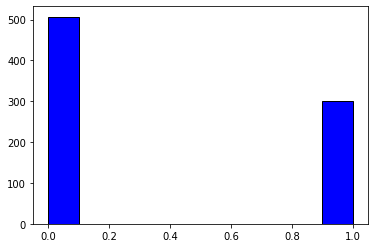

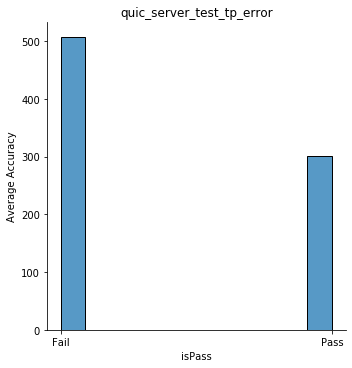

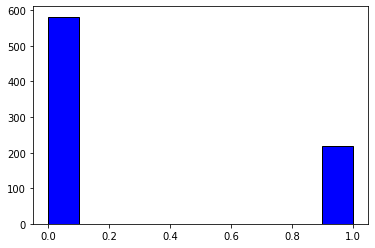

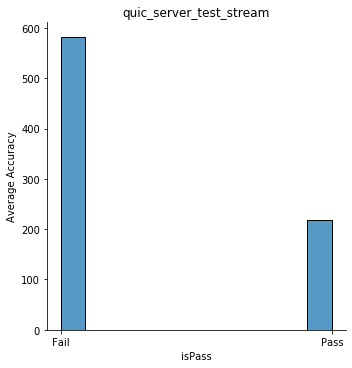

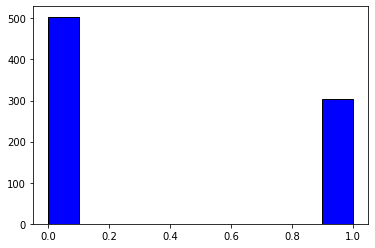

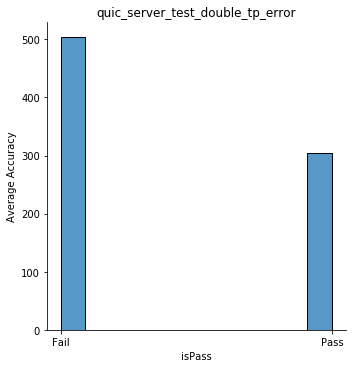

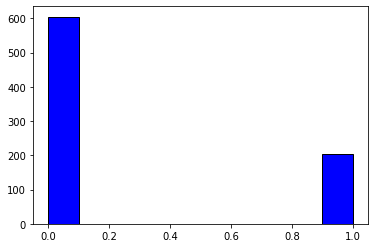

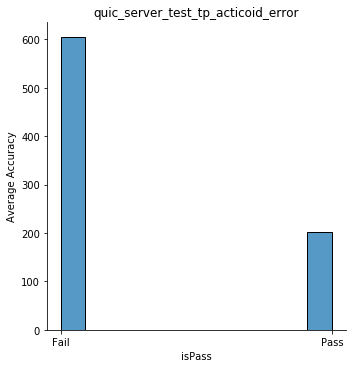

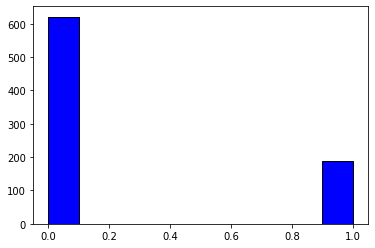

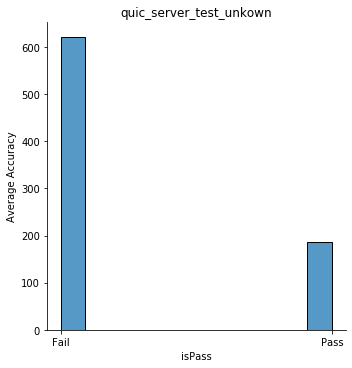

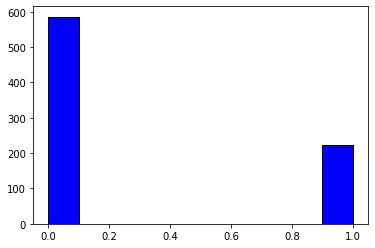

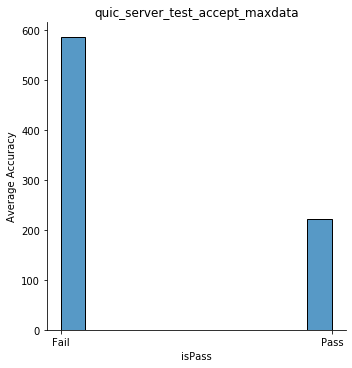

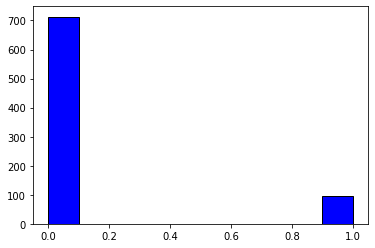

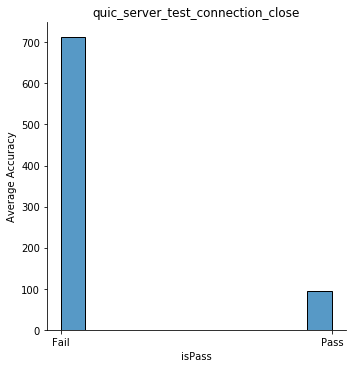

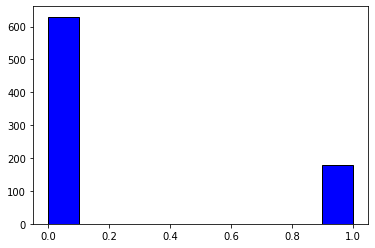

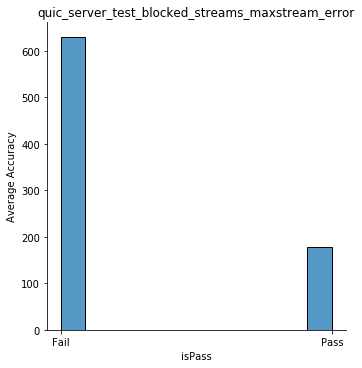

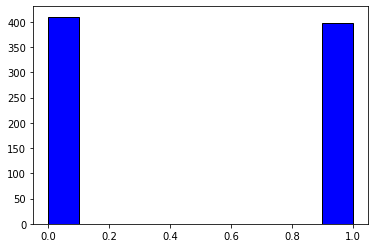

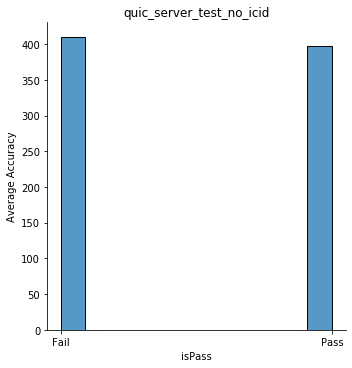

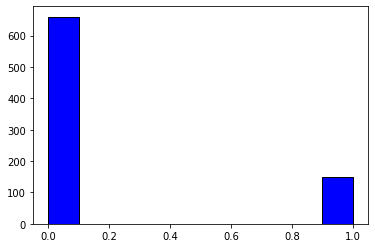

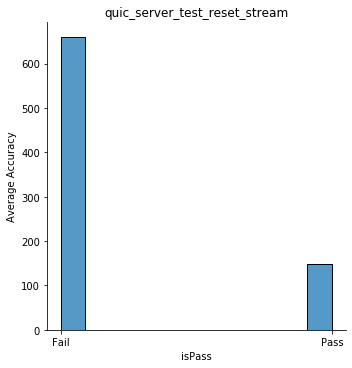

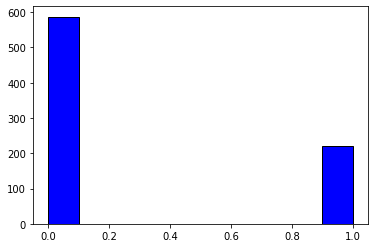

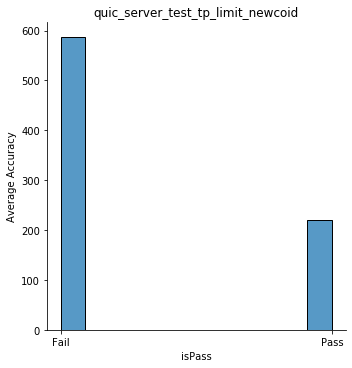

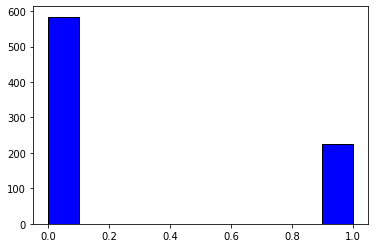

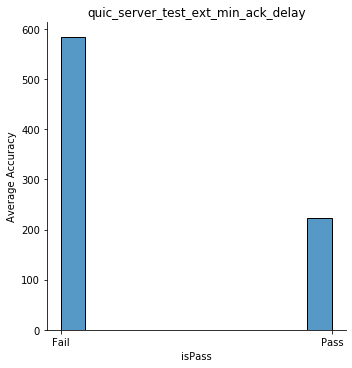

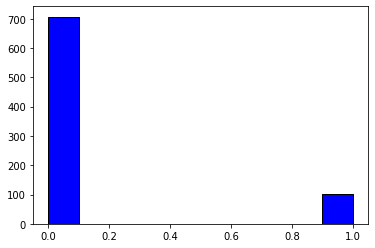

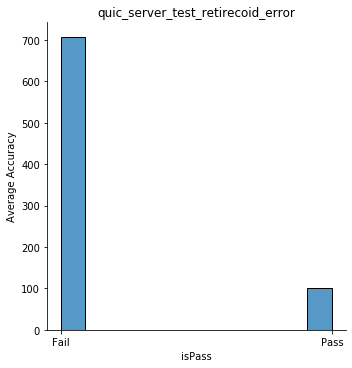

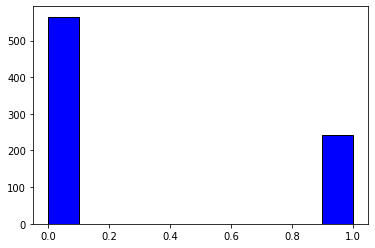

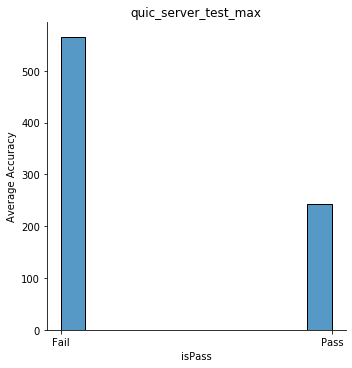

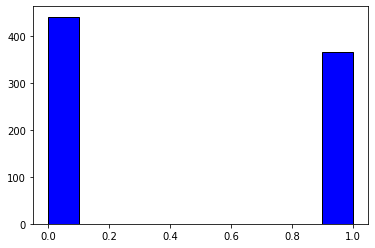

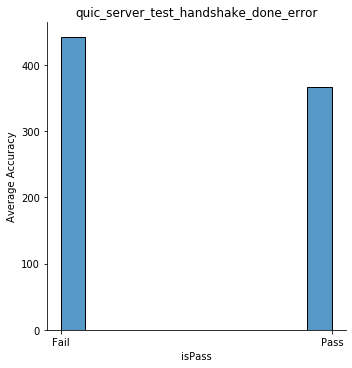

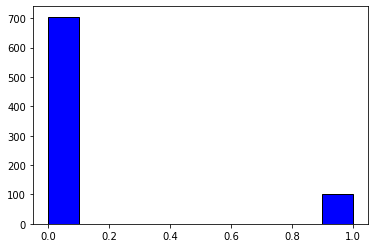

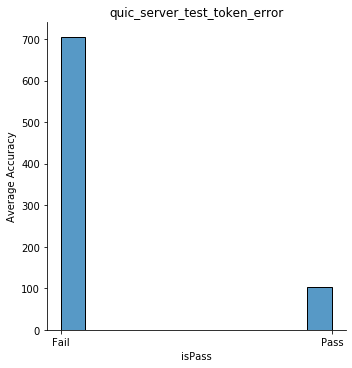

In [26]:
tests = train_df.TestName.unique()

for t in tests:
    subdf = train_df.loc[train_df['TestName'] == t]
    plt.hist(subdf['isPass'], color = 'blue', edgecolor = 'black')

    # seaborn histogram
    sns.displot(subdf['isPass'], kde=False)
    # Add labels
    plt.title(t)
    plt.xticks(np.arange(0, 2, 1))
    positions = (0, 1)
    labels = ("Fail", "Pass")
    plt.xticks(positions, labels)
    plt.xlabel('isPass')
    plt.ylabel('Average Accuracy')
    plt.show()

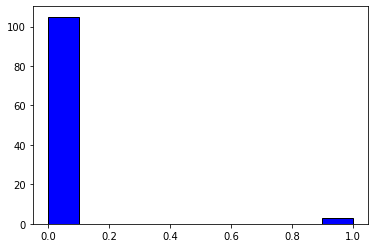

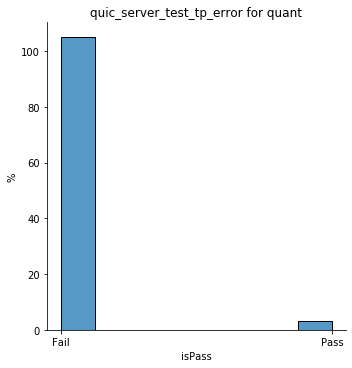

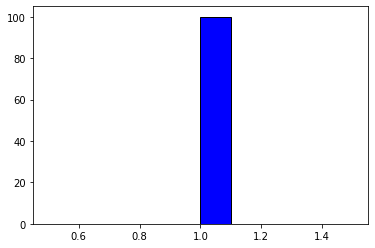

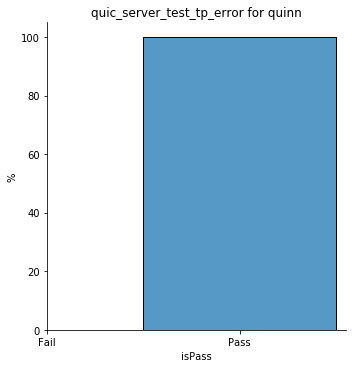

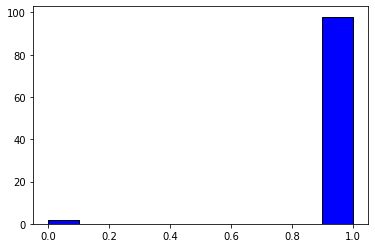

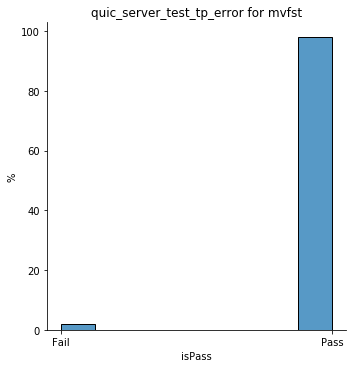

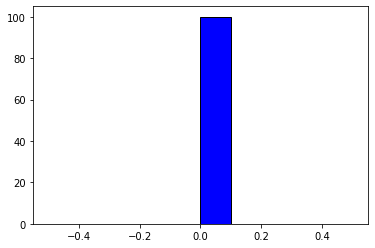

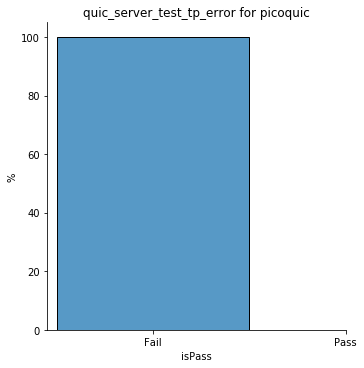

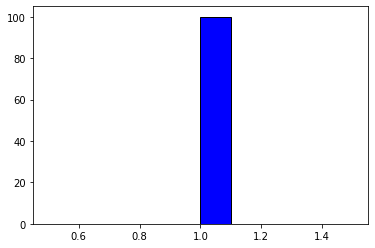

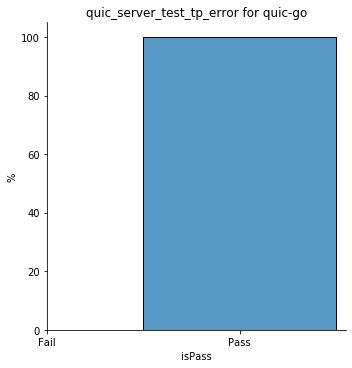

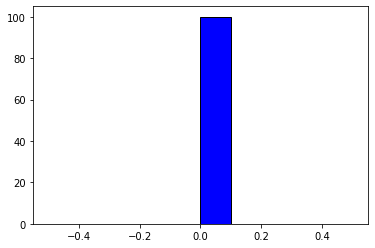

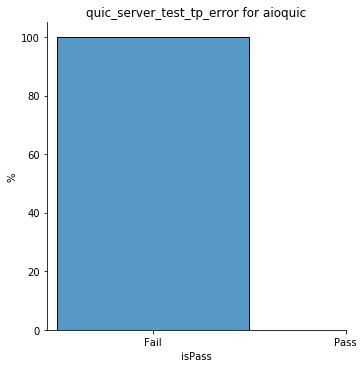

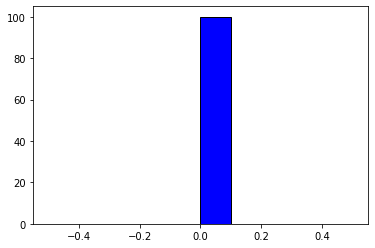

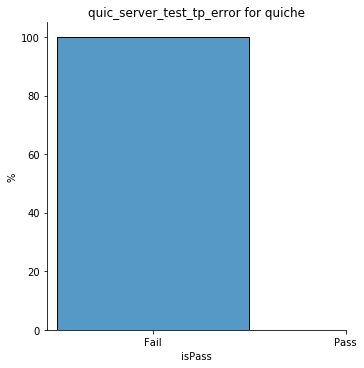

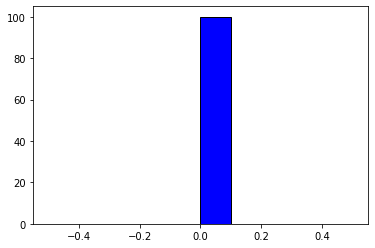

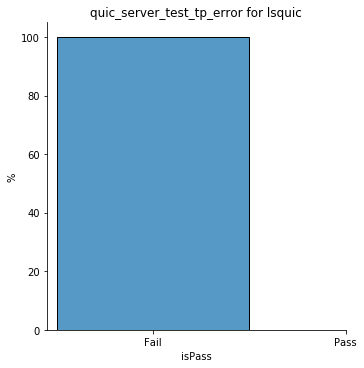

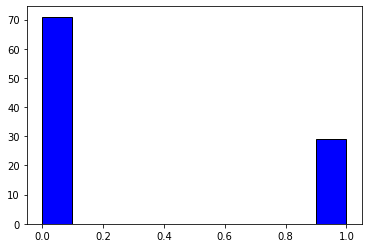

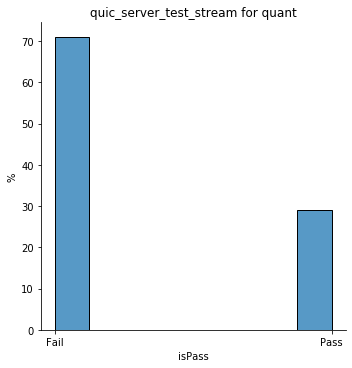

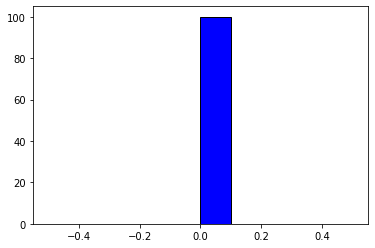

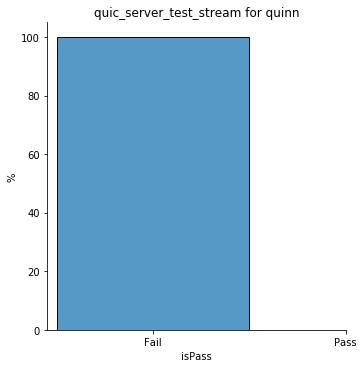

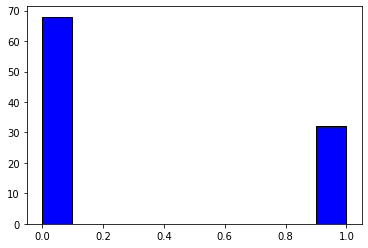

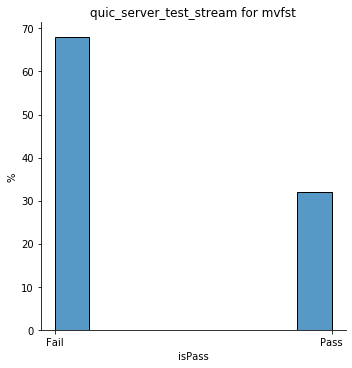

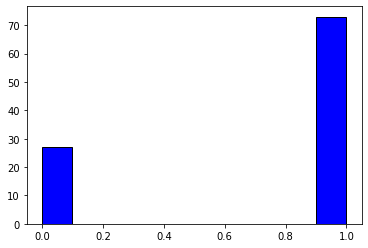

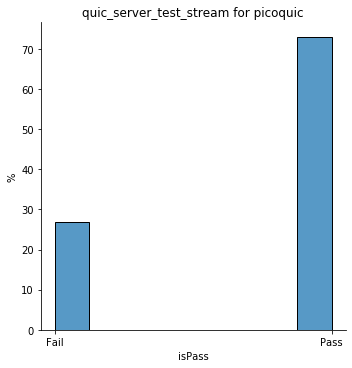

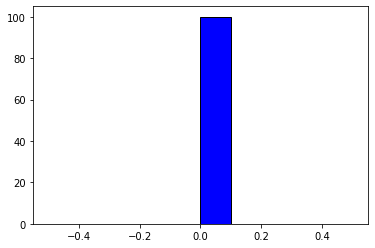

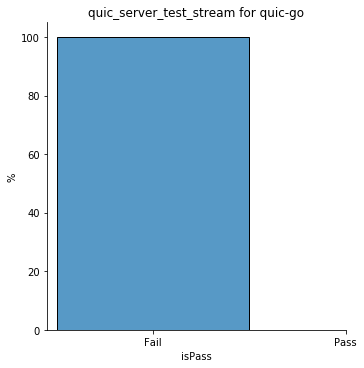

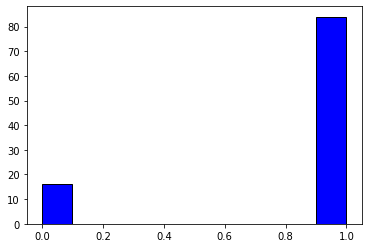

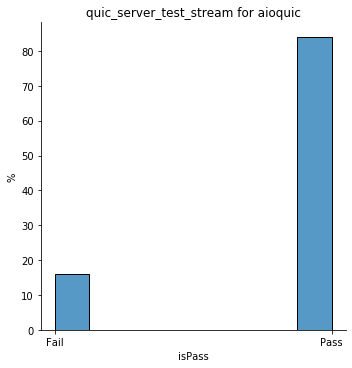

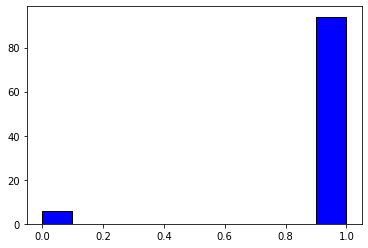

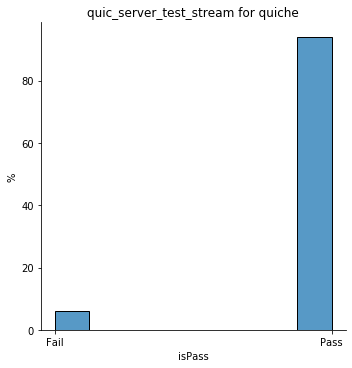

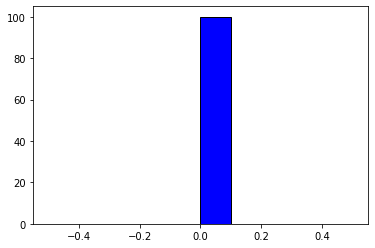

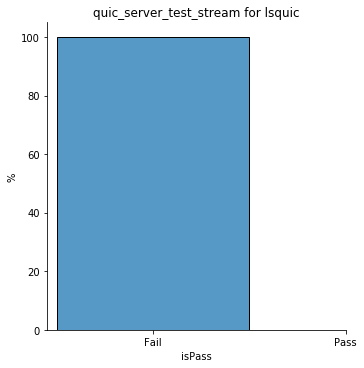

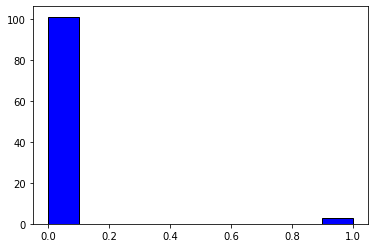

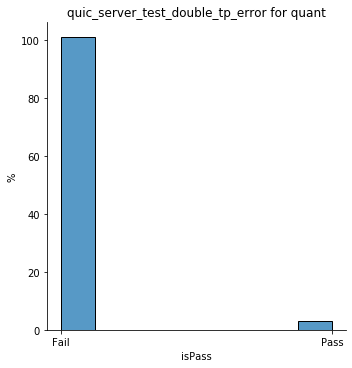

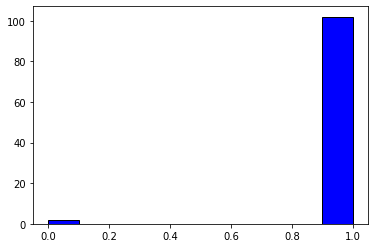

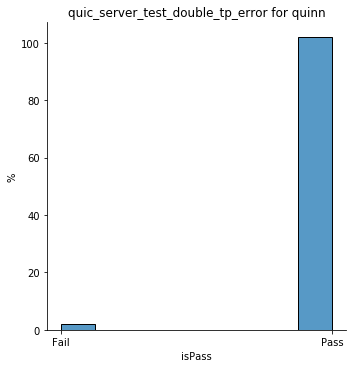

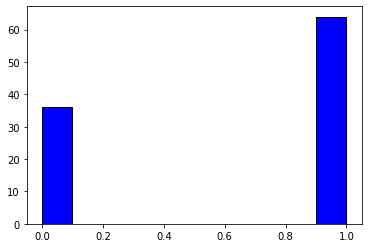

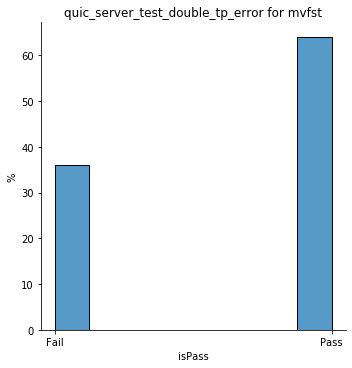

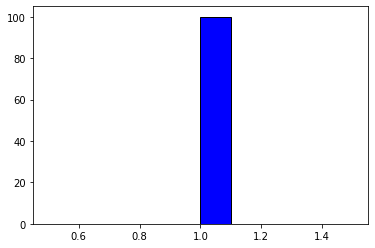

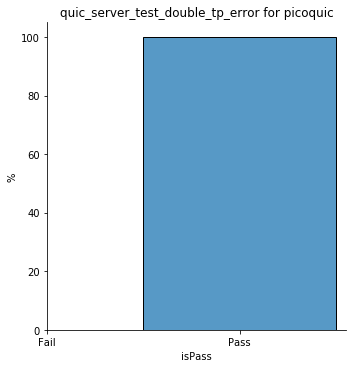

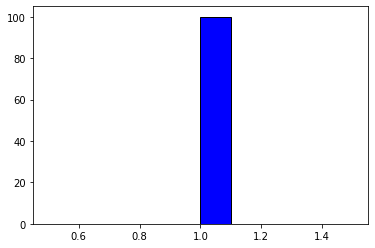

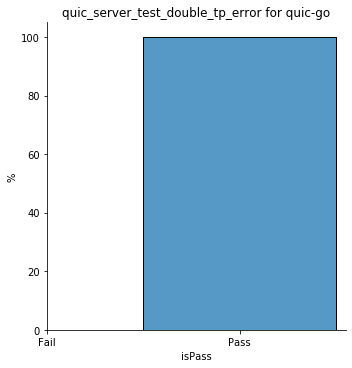

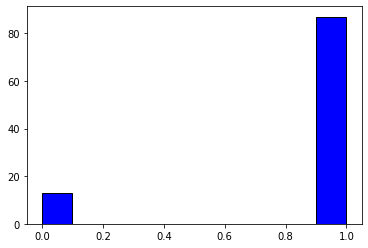

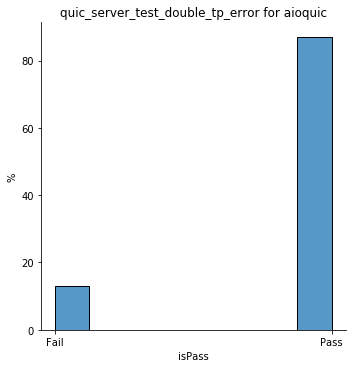

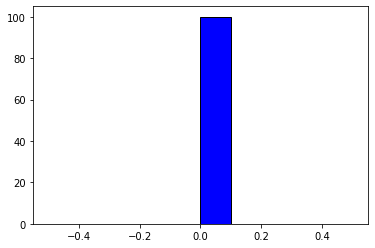

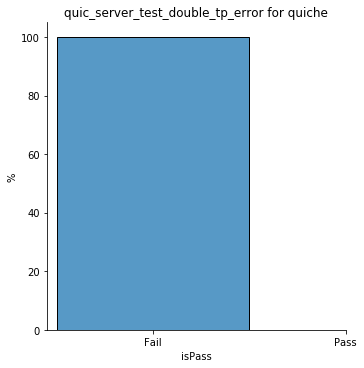

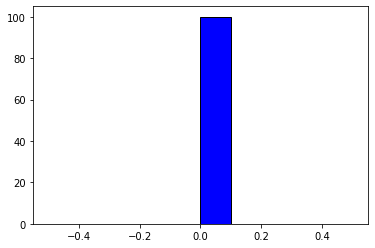

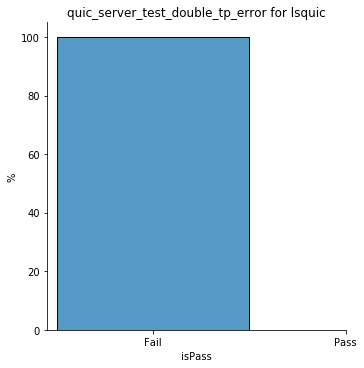

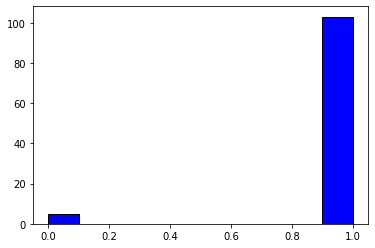

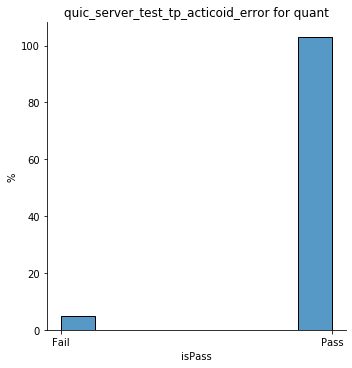

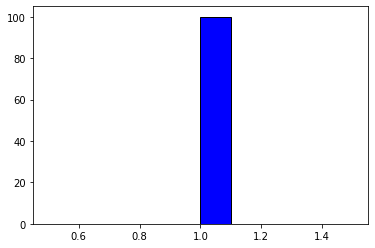

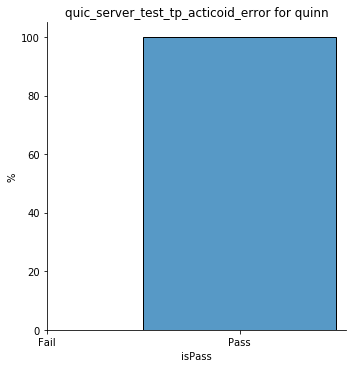

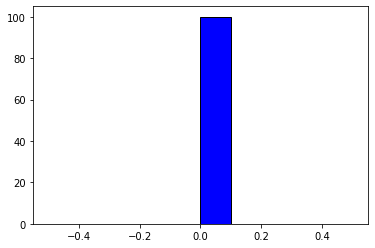

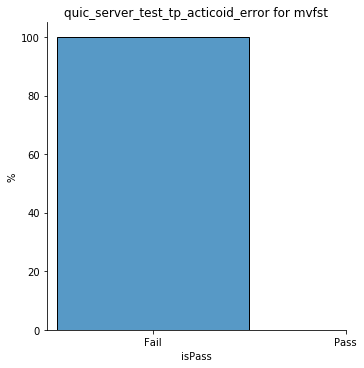

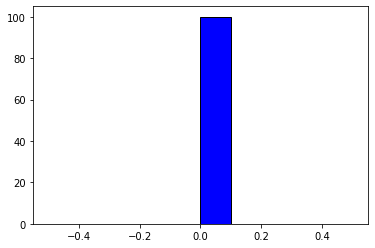

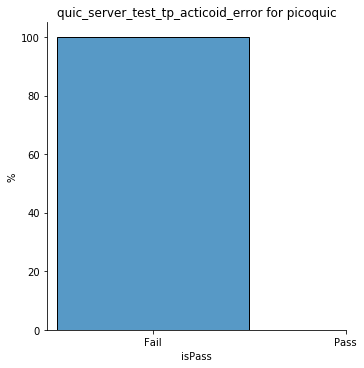

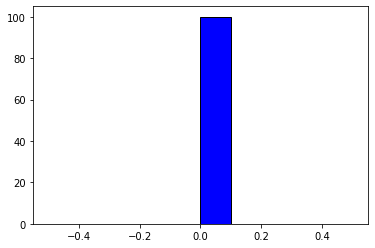

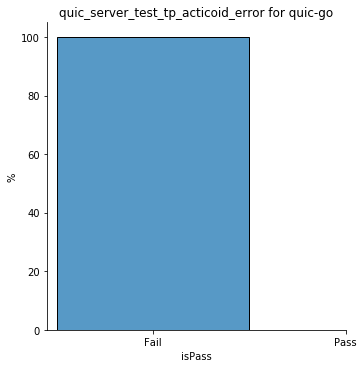

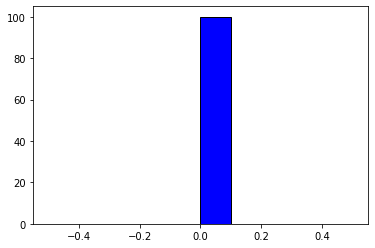

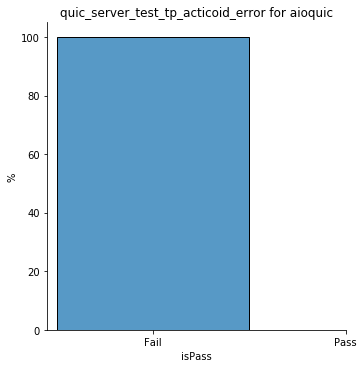

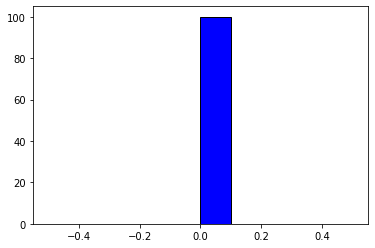

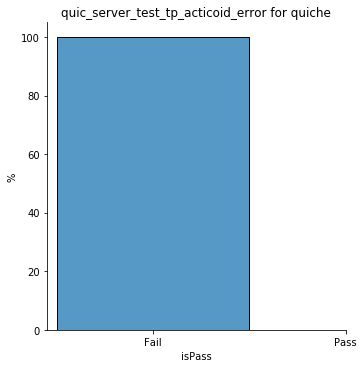

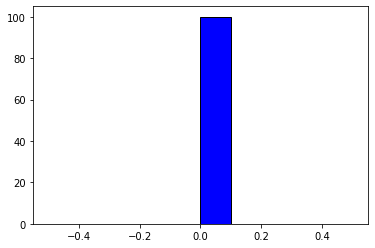

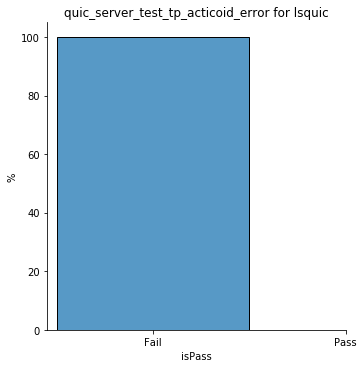

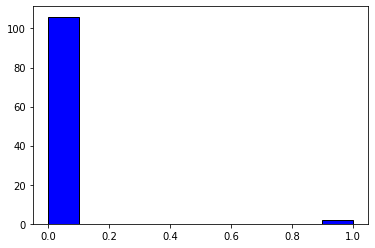

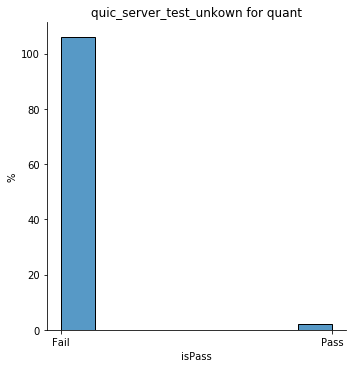

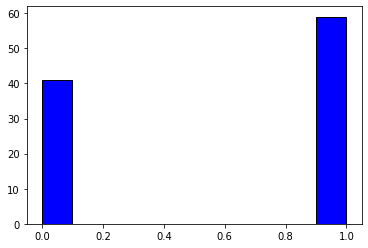

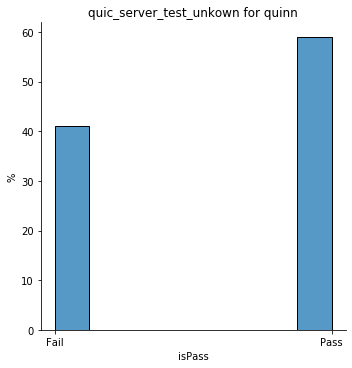

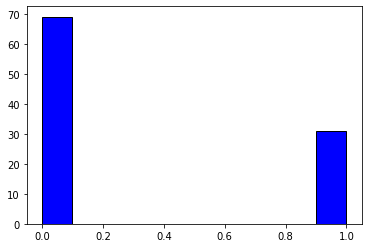

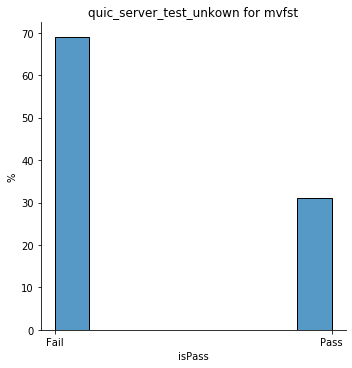

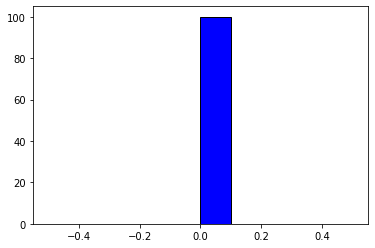

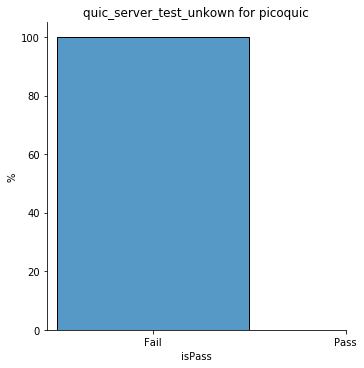

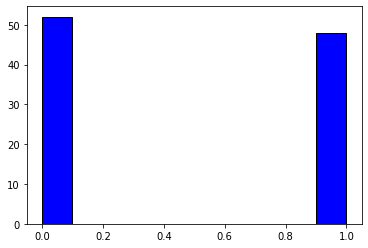

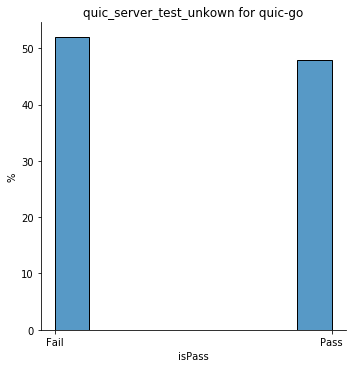

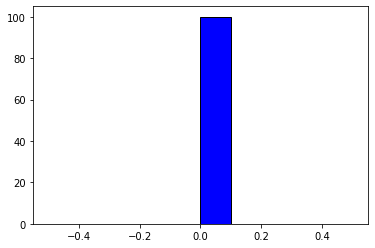

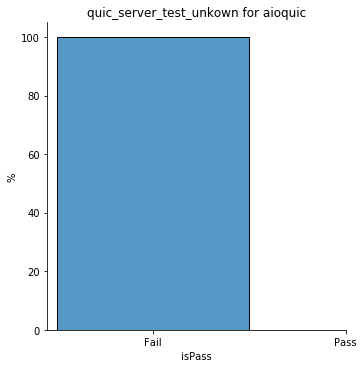

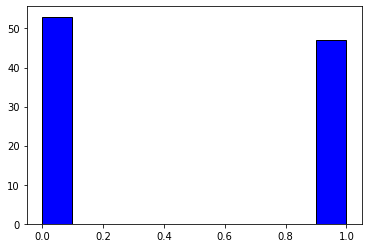

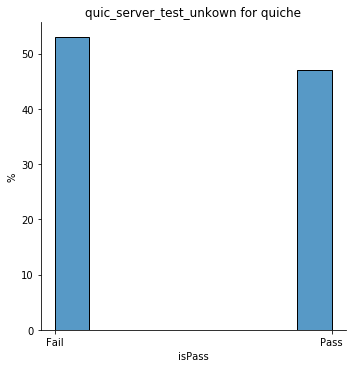

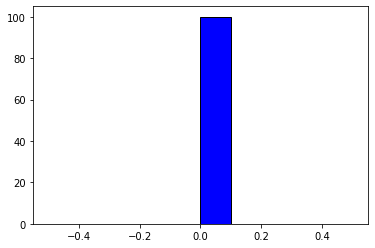

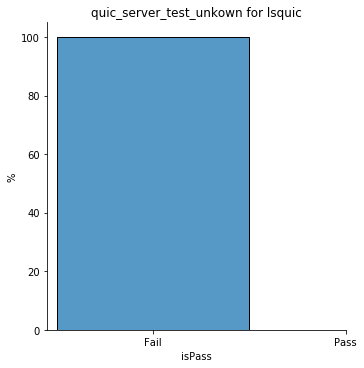

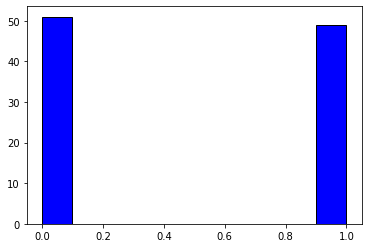

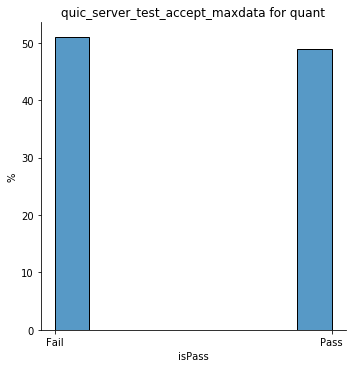

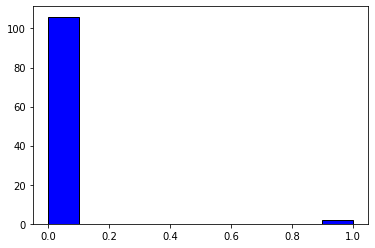

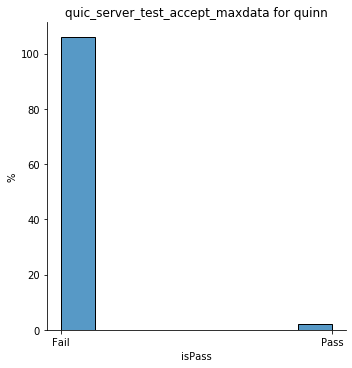

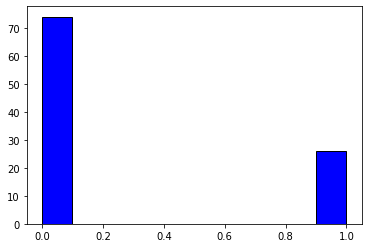

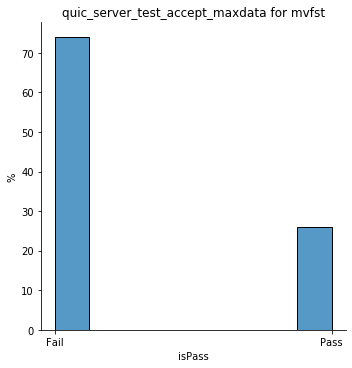

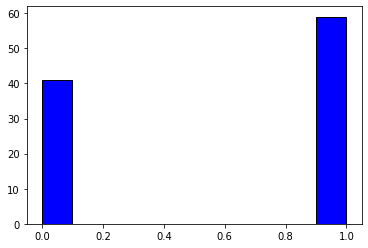

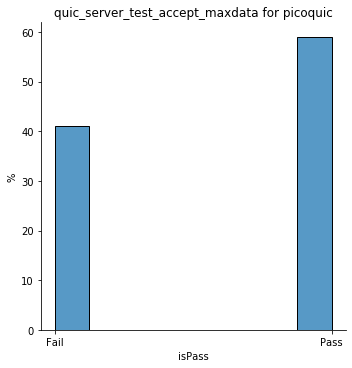

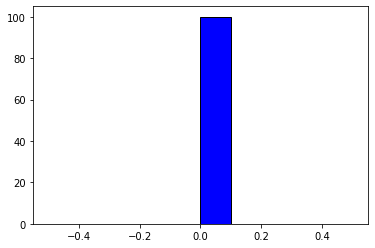

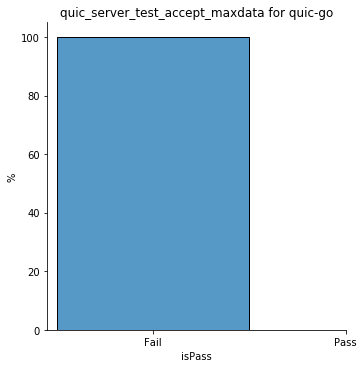

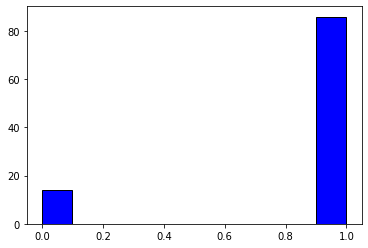

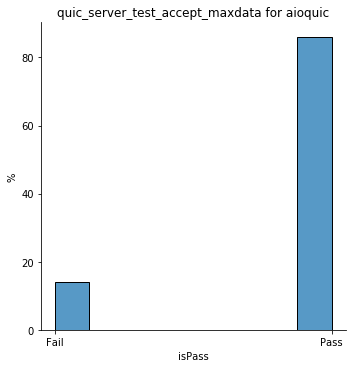

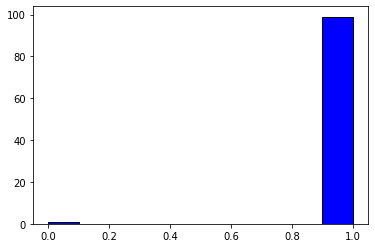

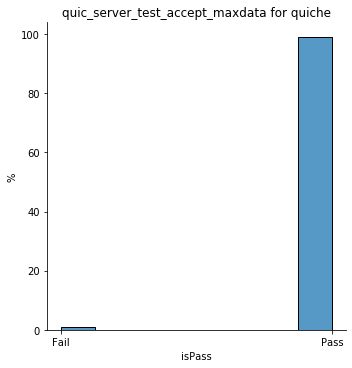

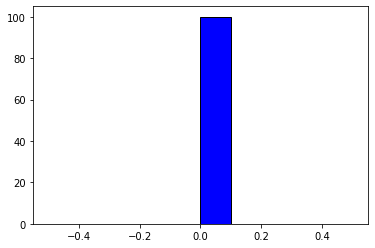

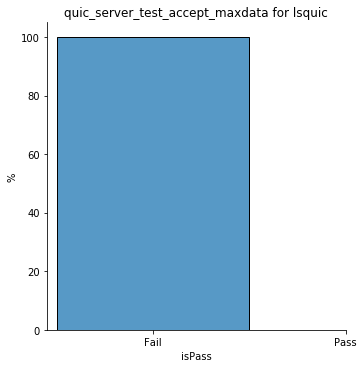

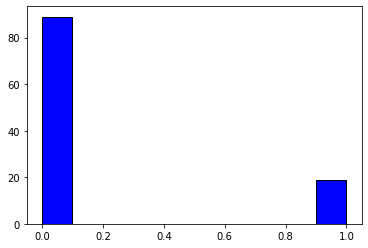

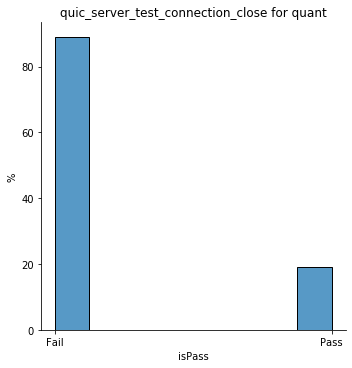

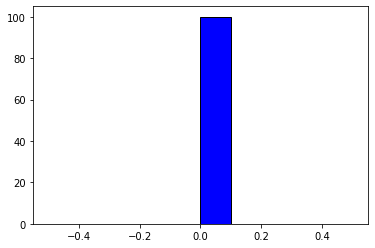

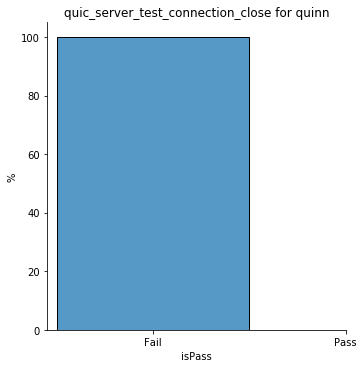

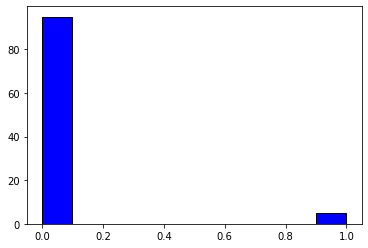

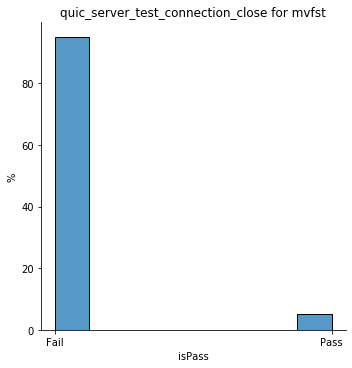

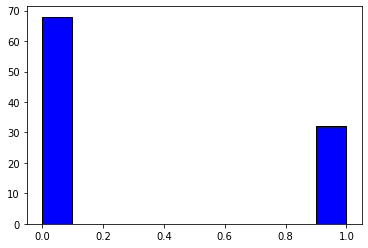

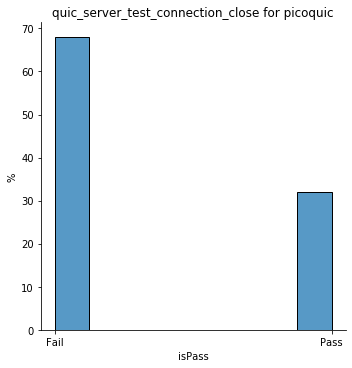

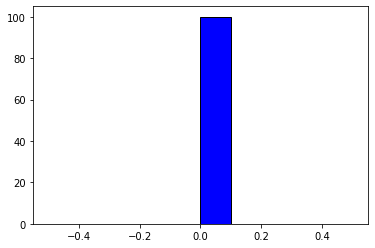

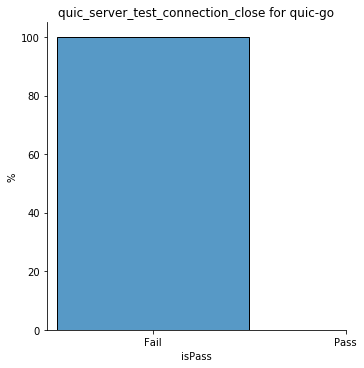

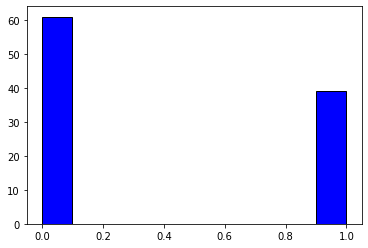

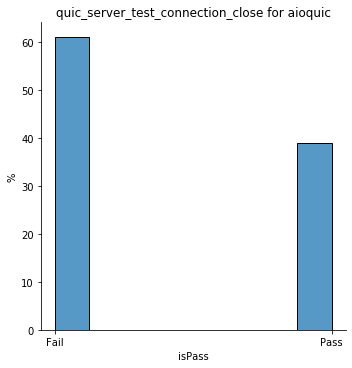

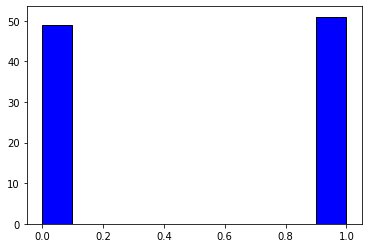

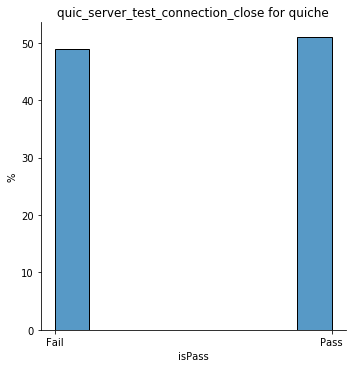

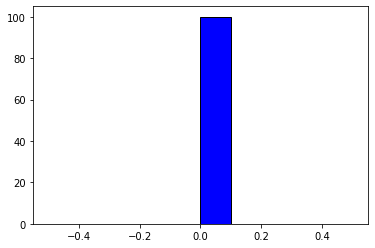

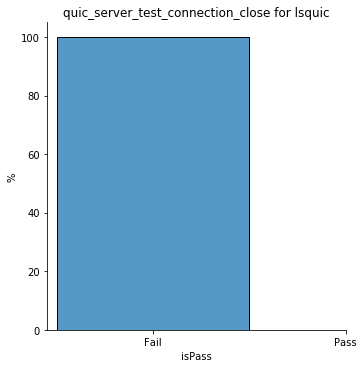

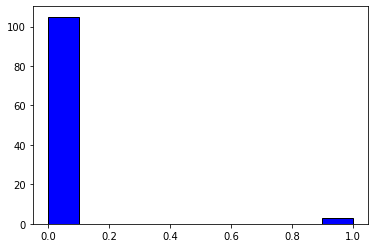

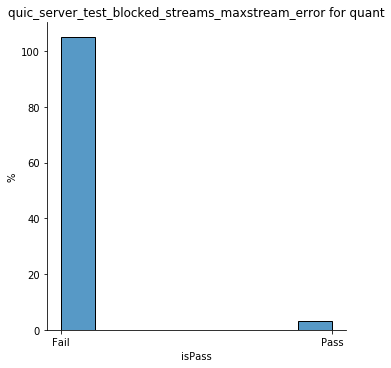

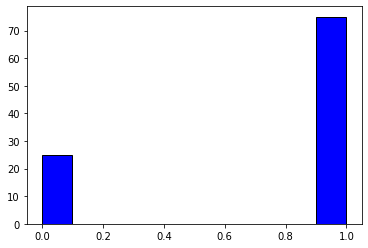

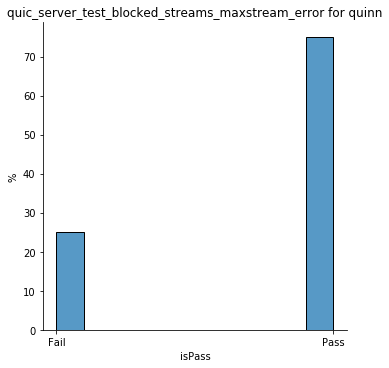

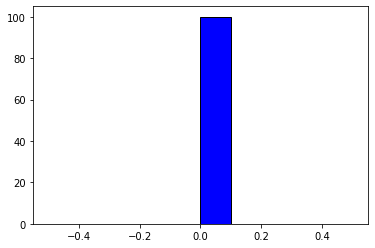

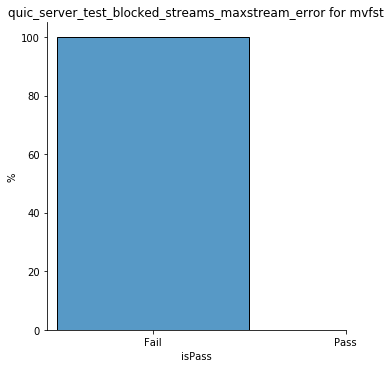

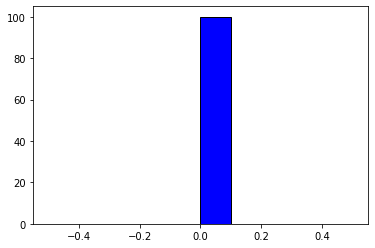

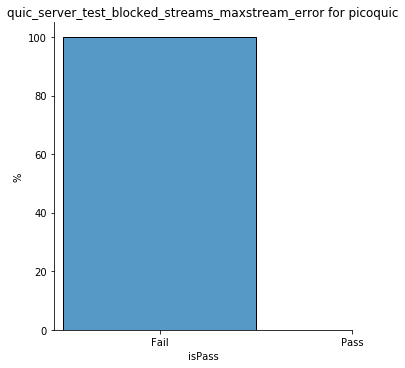

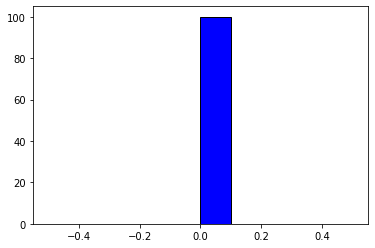

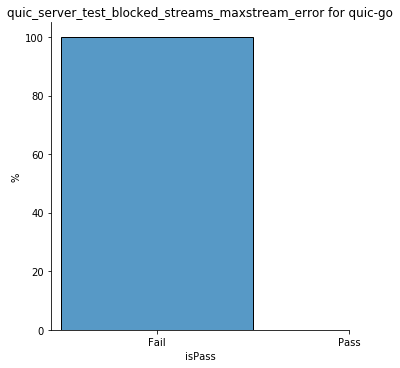

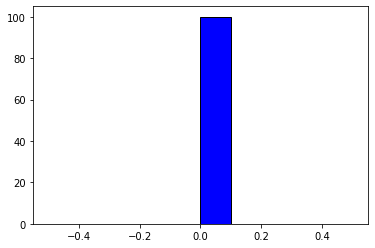

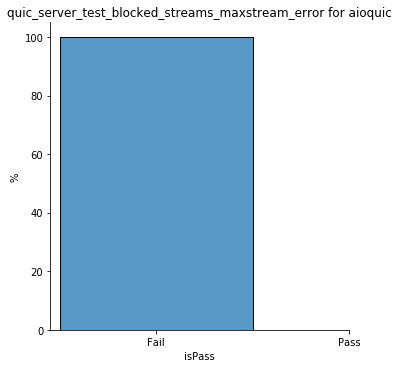

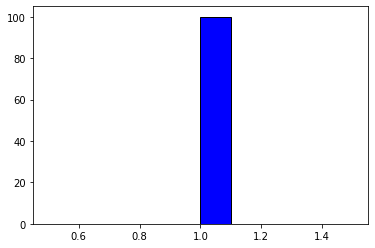

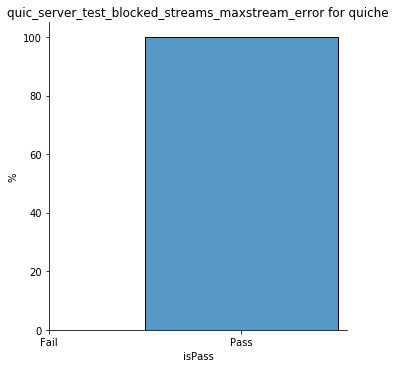

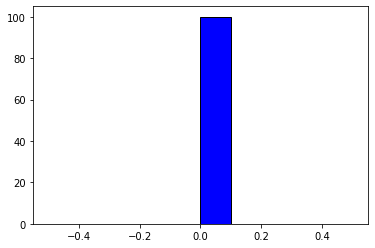

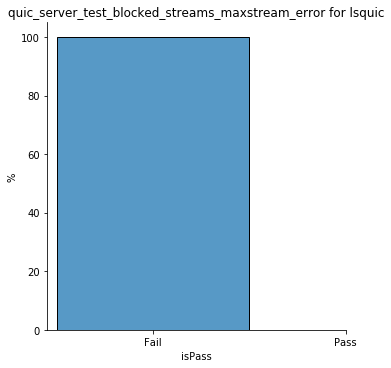

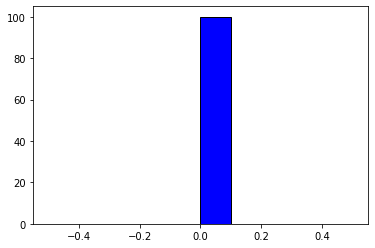

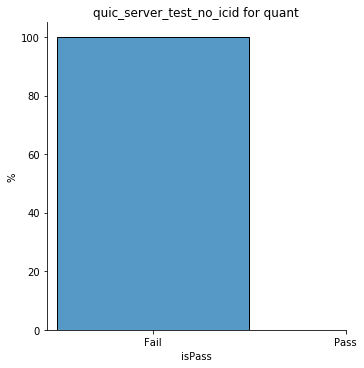

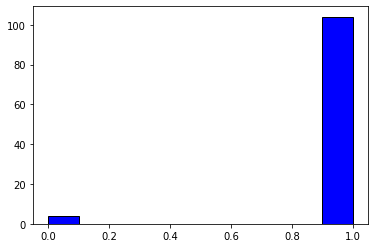

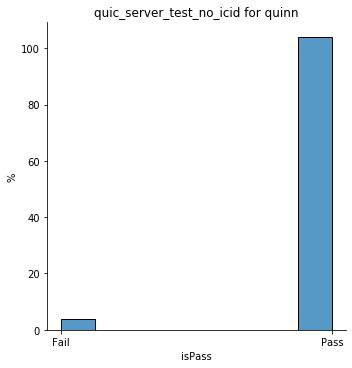

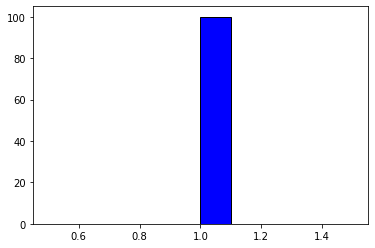

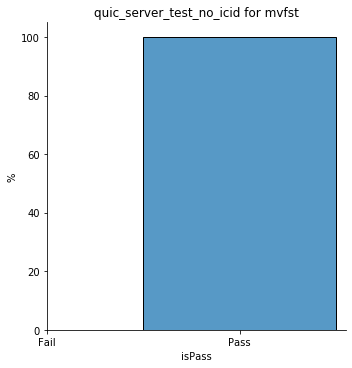

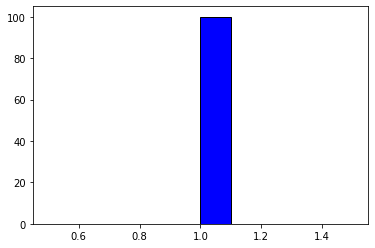

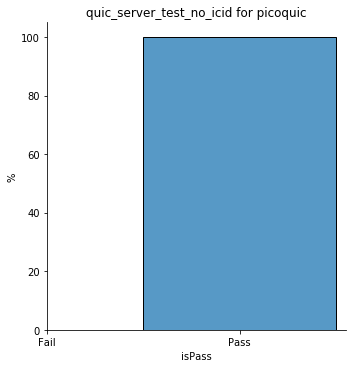

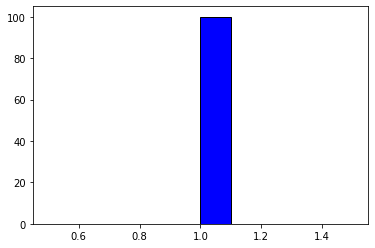

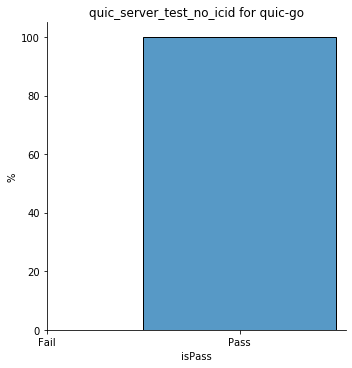

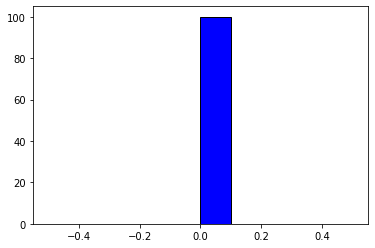

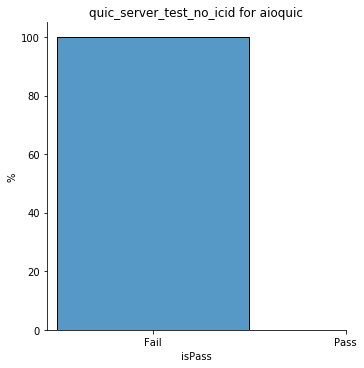

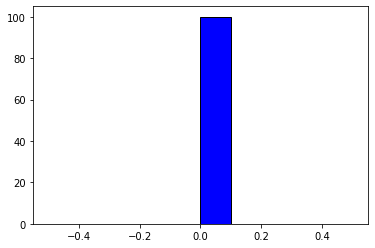

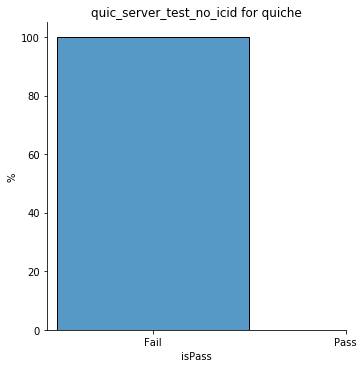

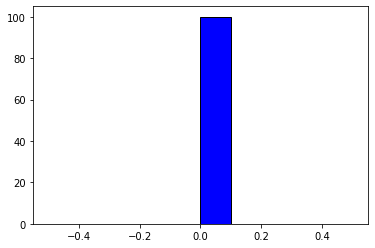

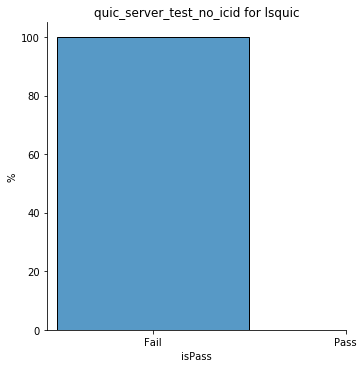

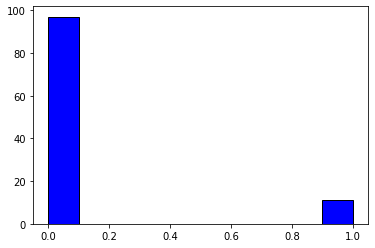

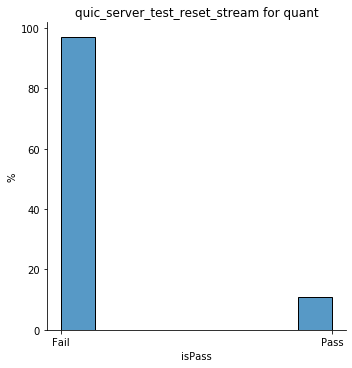

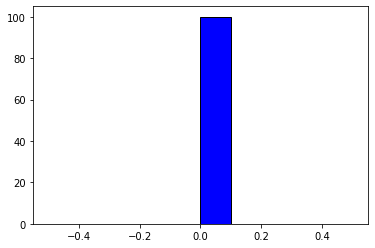

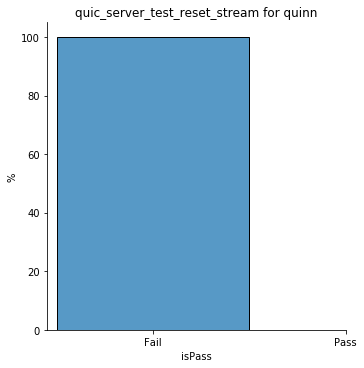

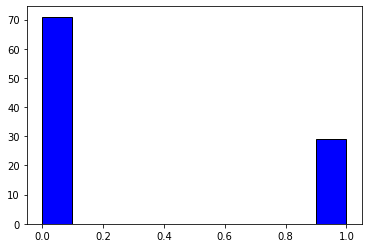

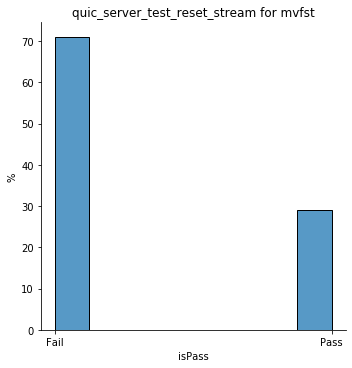

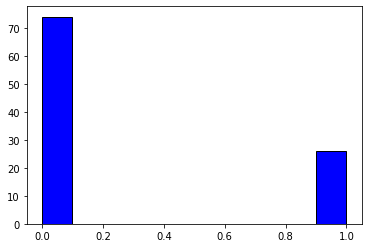

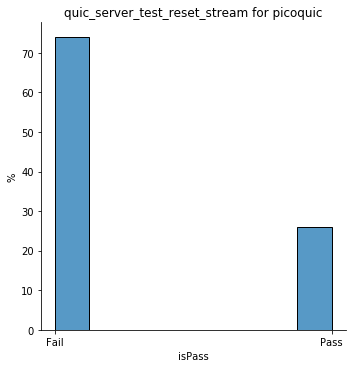

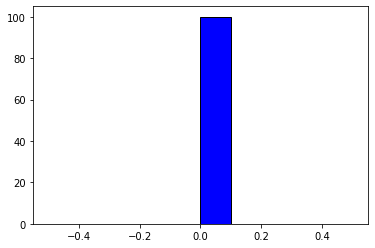

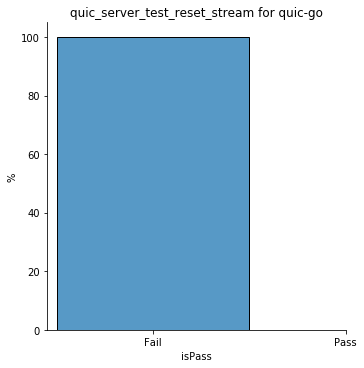

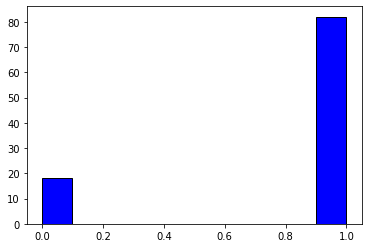

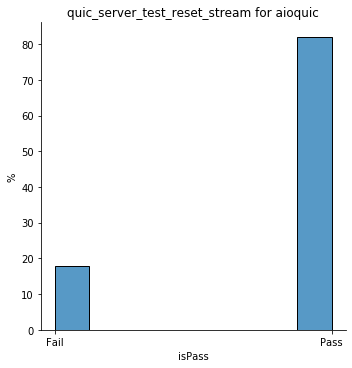

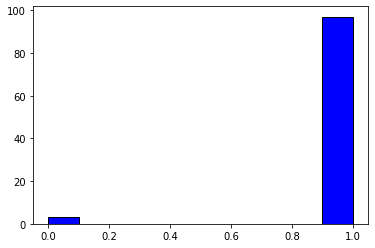

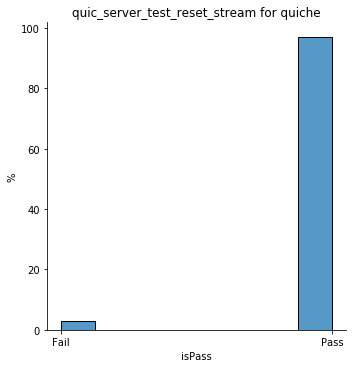

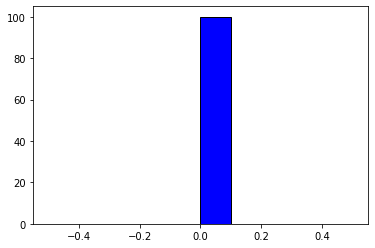

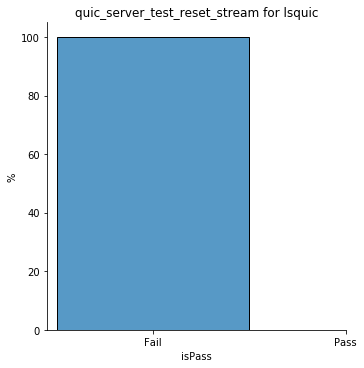

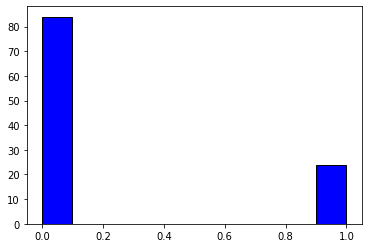

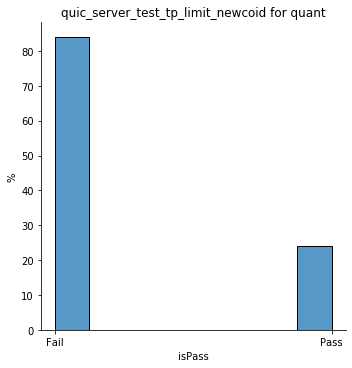

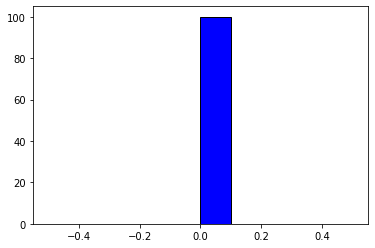

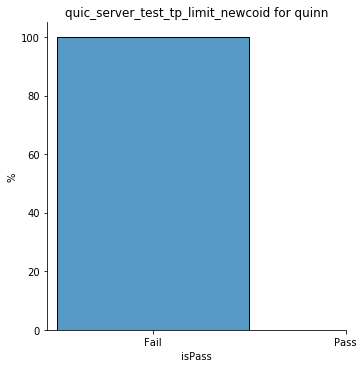

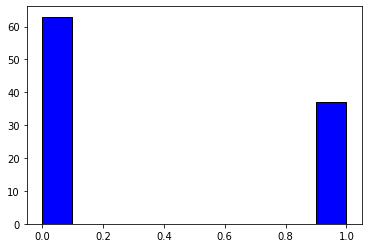

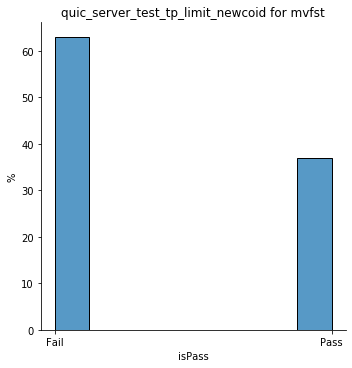

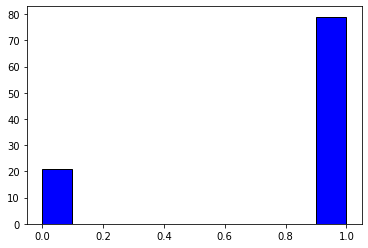

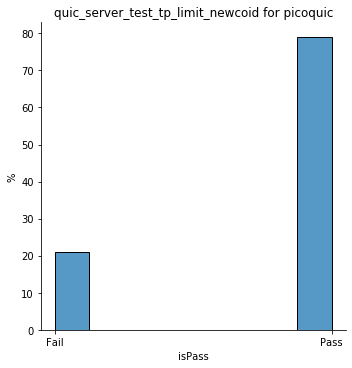

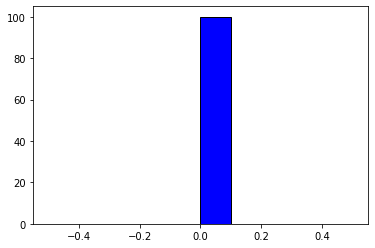

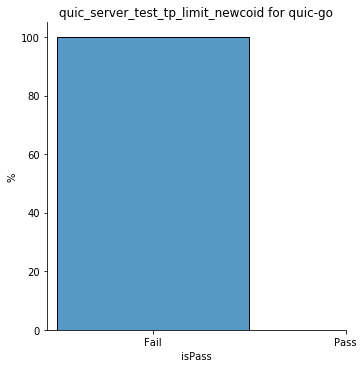

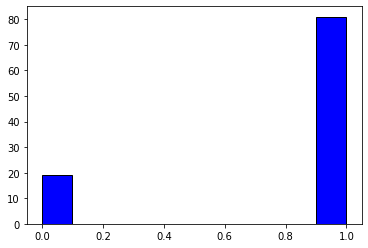

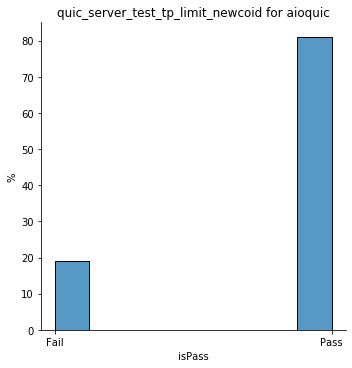

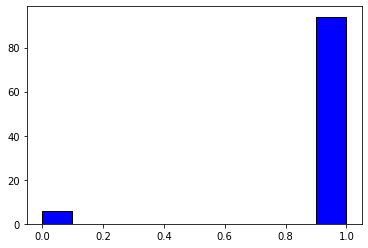

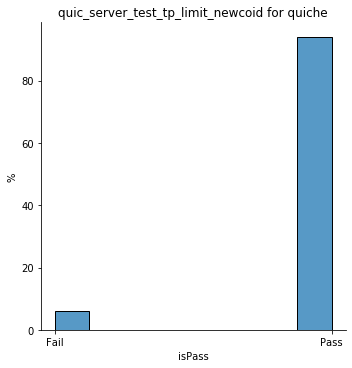

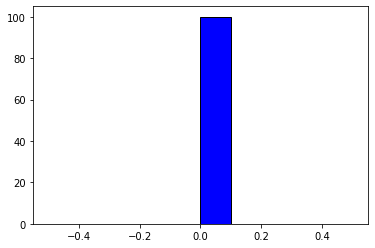

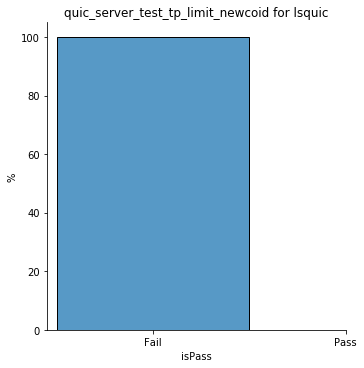

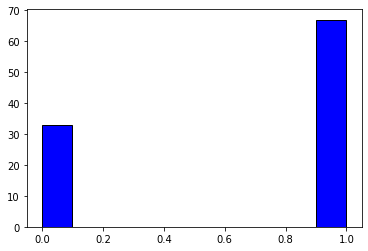

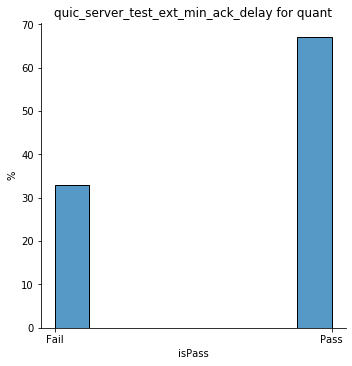

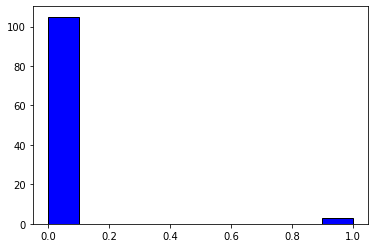

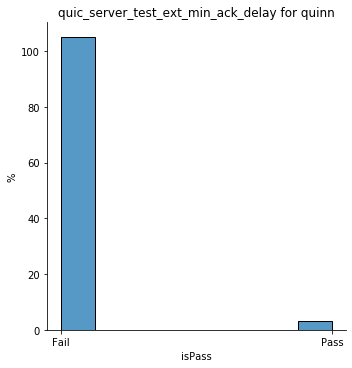

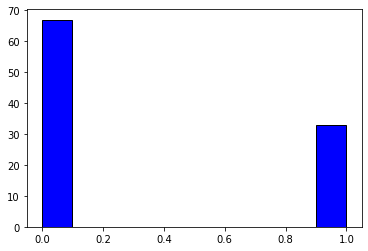

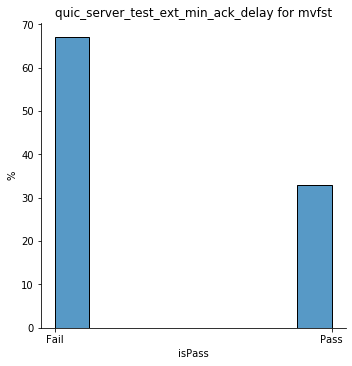

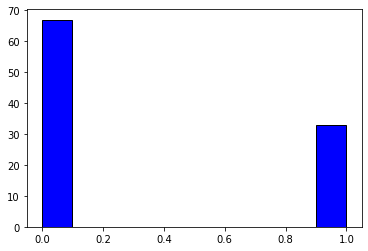

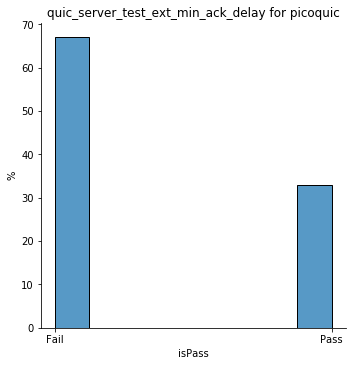

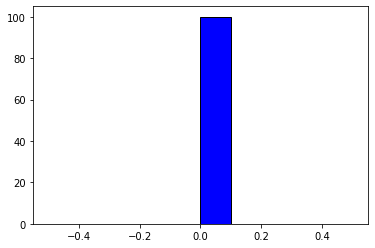

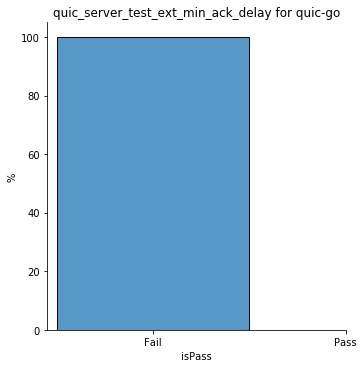

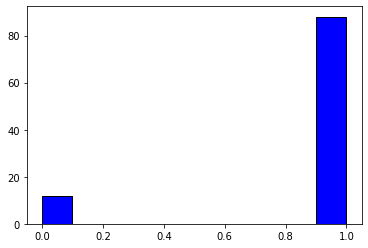

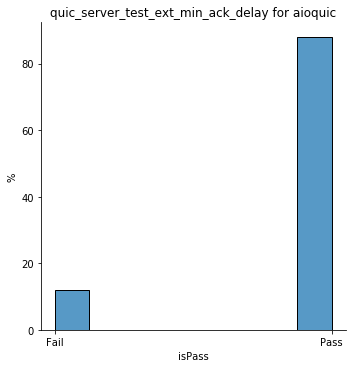

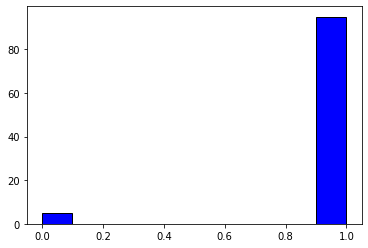

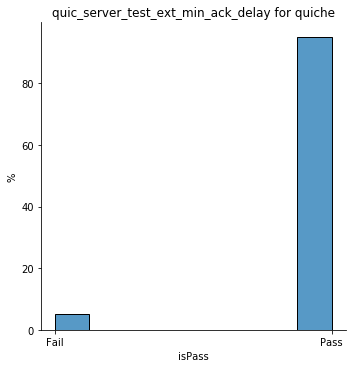

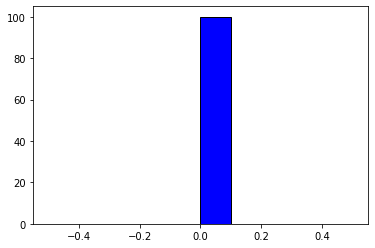

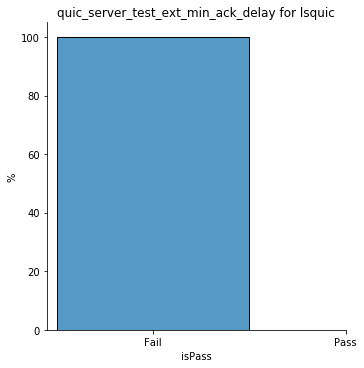

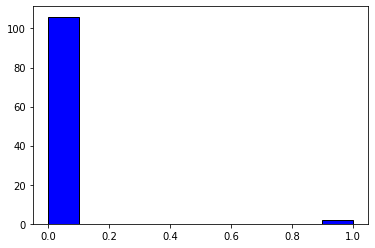

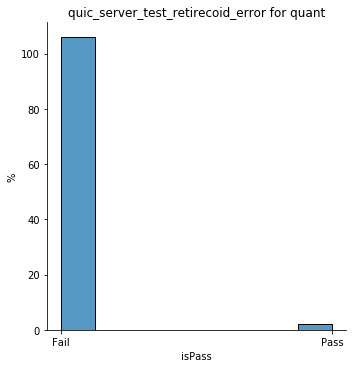

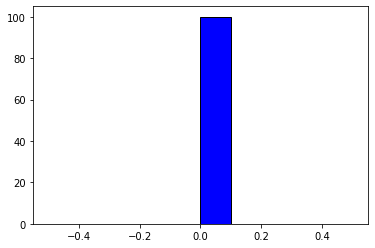

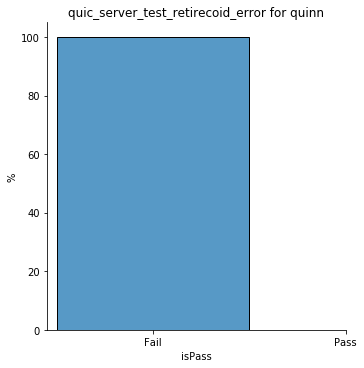

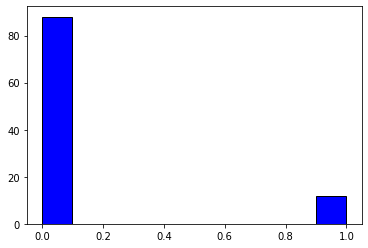

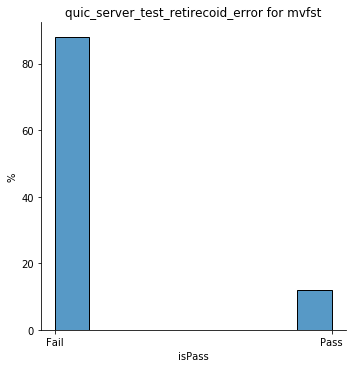

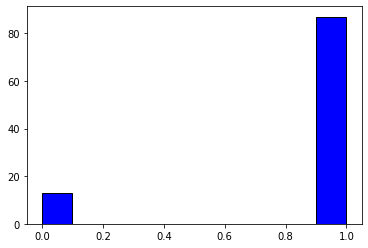

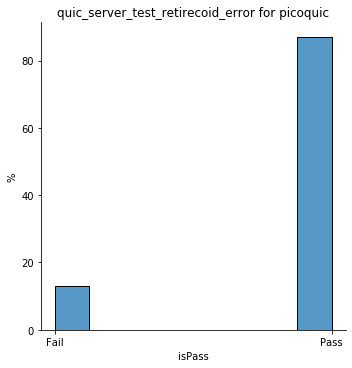

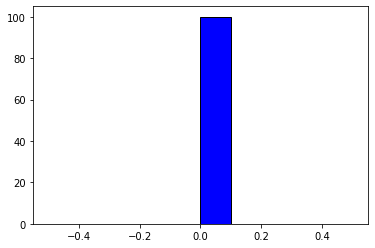

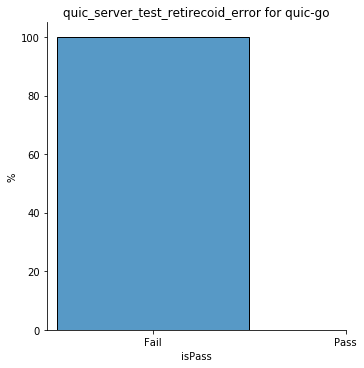

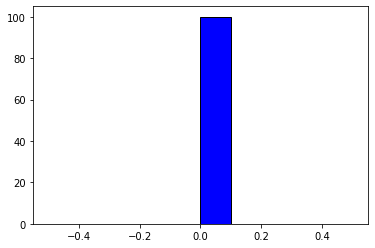

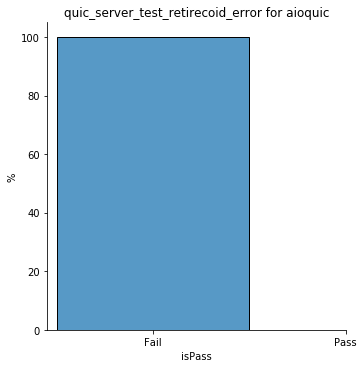

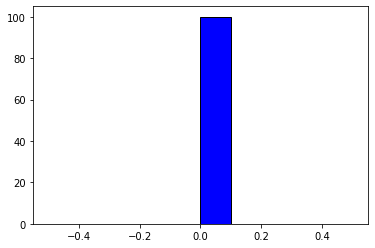

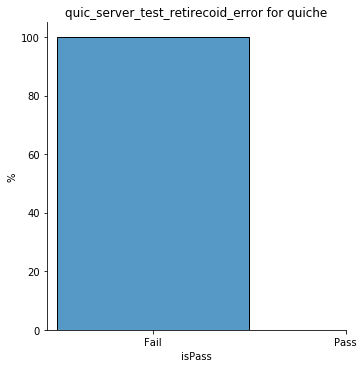

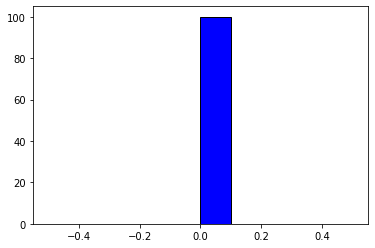

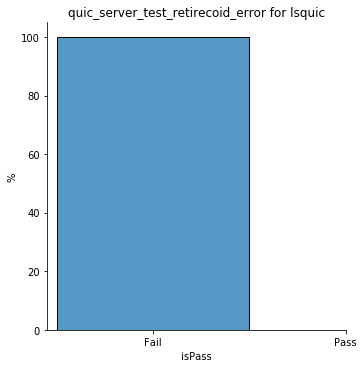

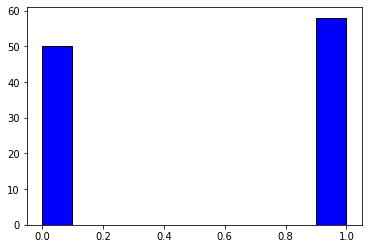

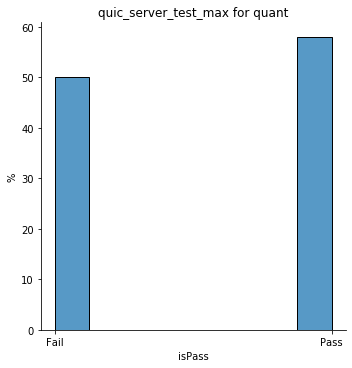

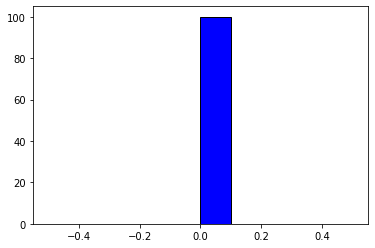

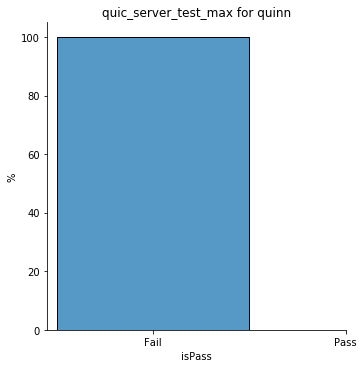

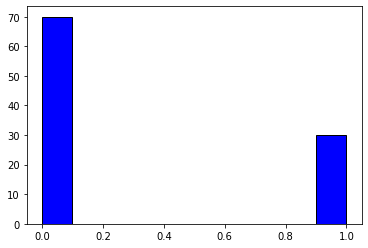

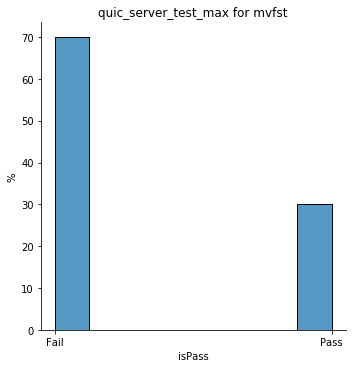

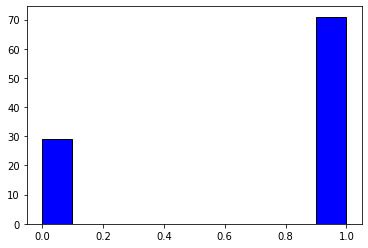

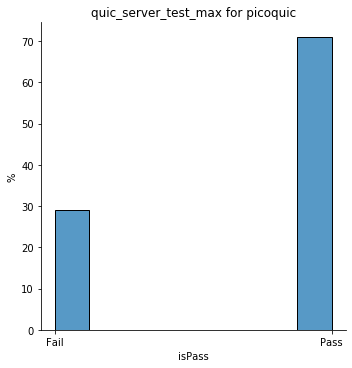

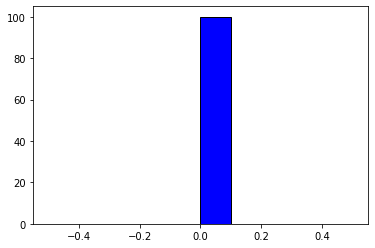

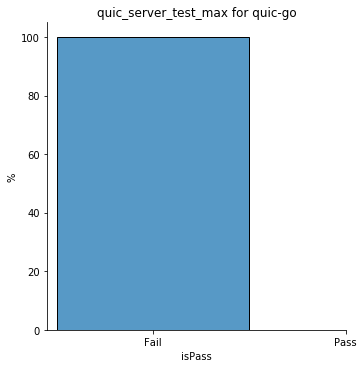

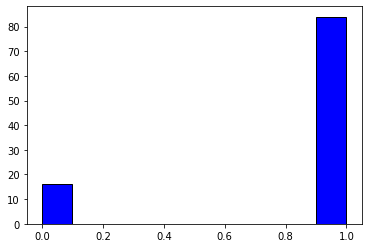

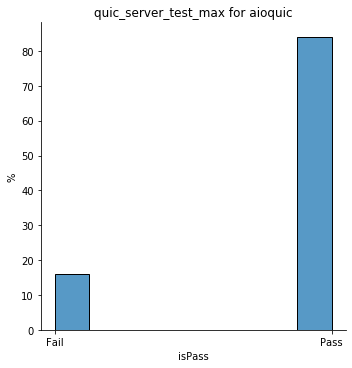

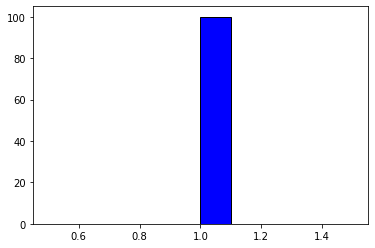

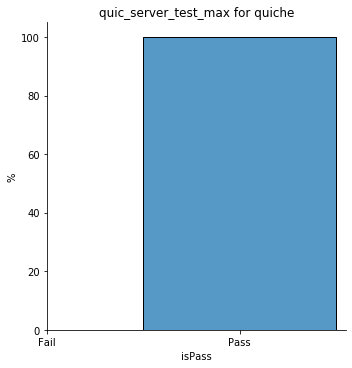

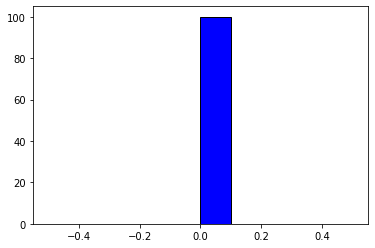

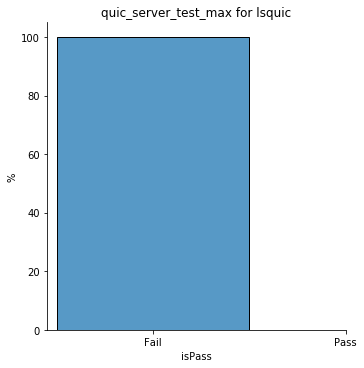

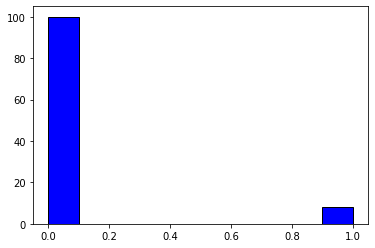

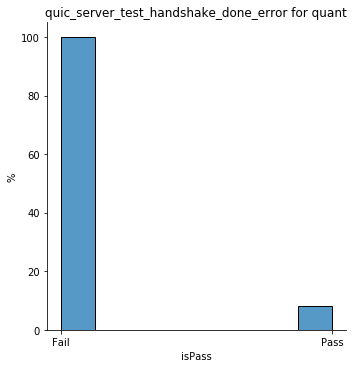

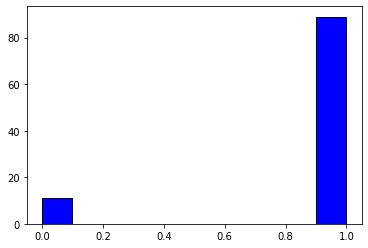

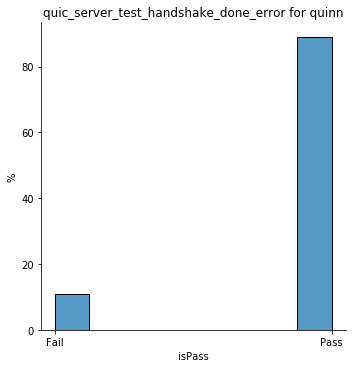

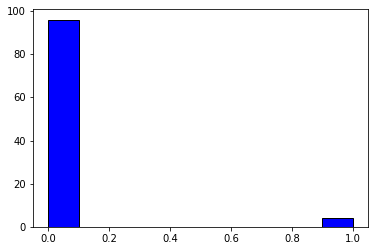

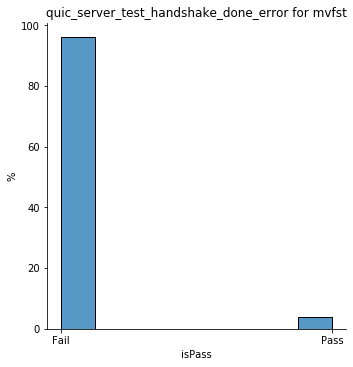

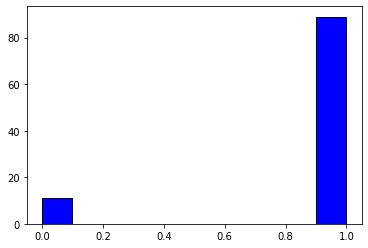

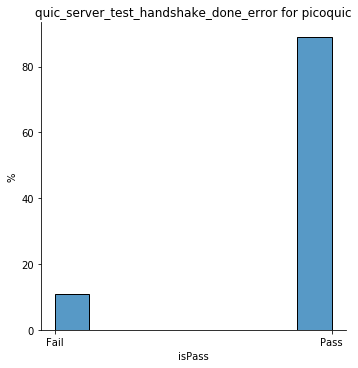

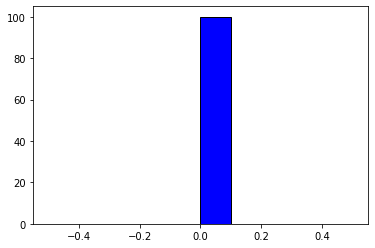

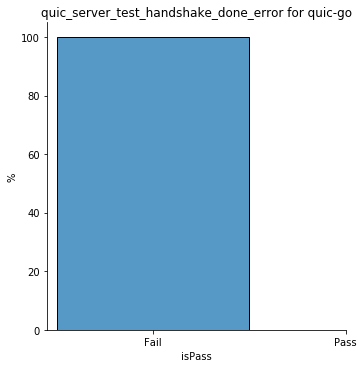

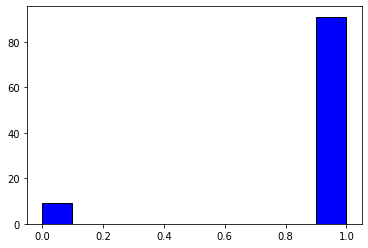

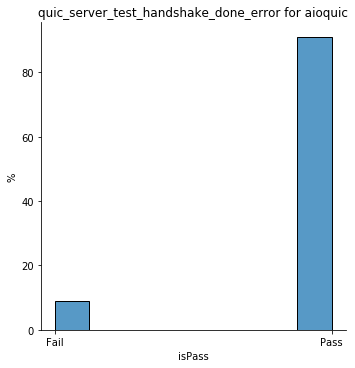

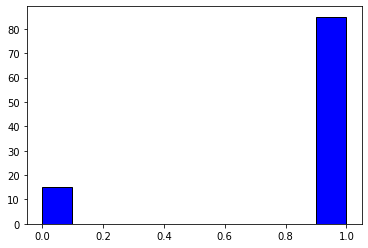

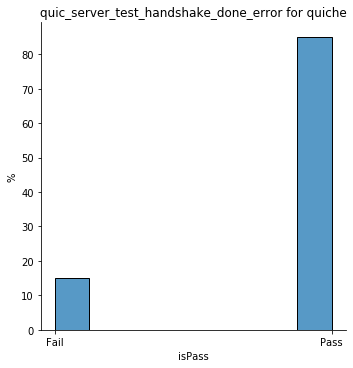

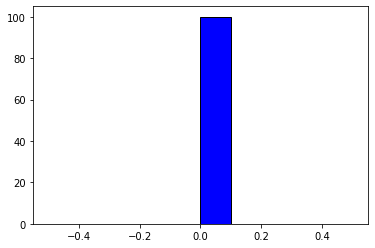

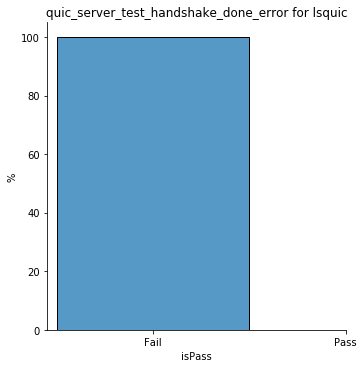

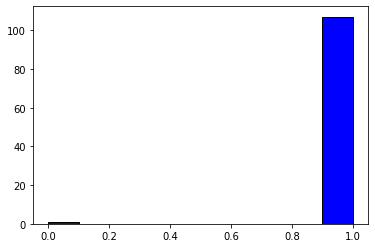

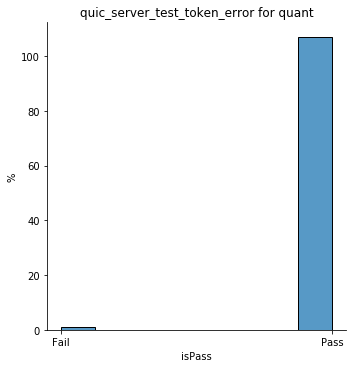

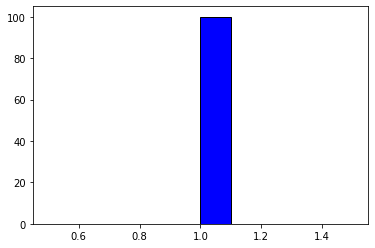

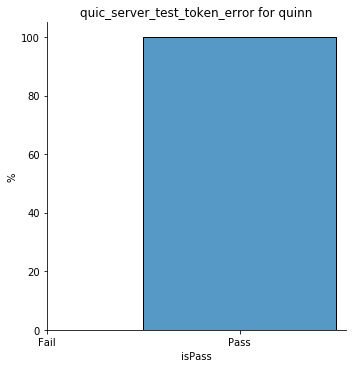

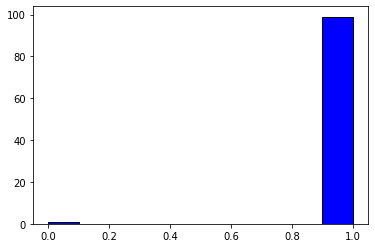

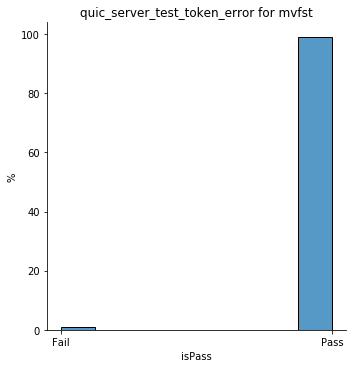

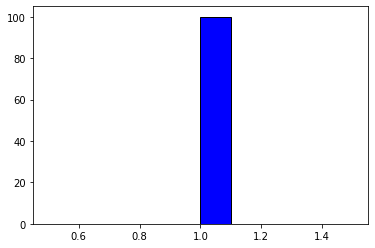

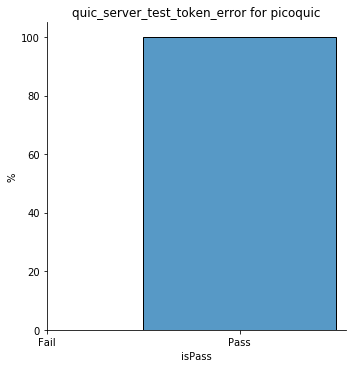

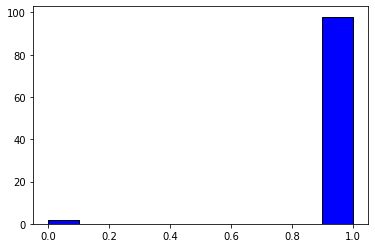

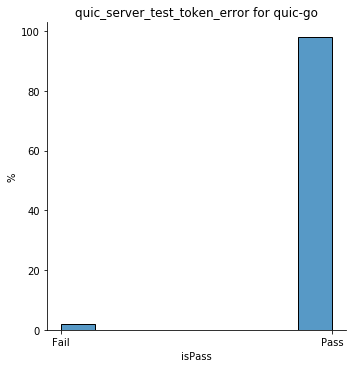

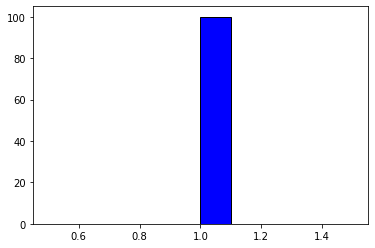

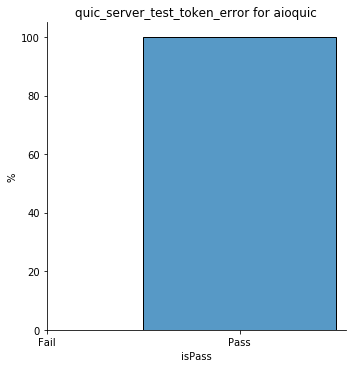

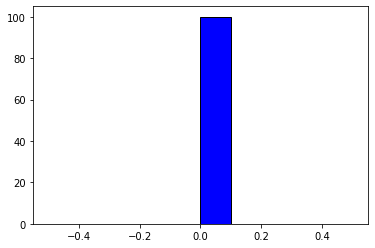

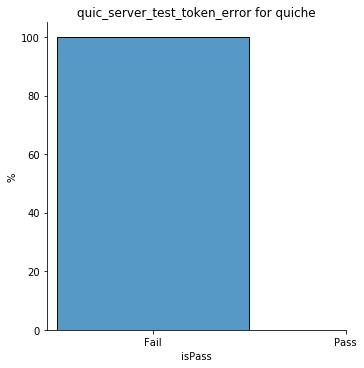

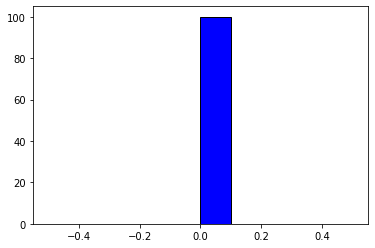

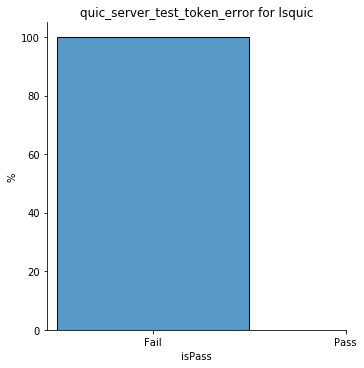

In [10]:
tests = train_df.TestName.unique()

servers = train_df.Implementation.unique() #['lsquic', 'quinn',  'mvfst', 'picoquic', 'quant', 'quic-go', 'aioquic']
#plt.figure(figsize=[10,10]) 'lsquic',
#f,a = plt.subplots(2,2)
#a = a.ravel()

for t in tests:
    subdf = train_df.loc[train_df['TestName'] == t]
    for s in servers:
        subsubdf = subdf.loc[subdf['Implementation'] == s]
        plt.hist(subsubdf['isPass'], color = 'blue', edgecolor = 'black')

        # seaborn histogram
        sns.displot(subsubdf['isPass'], kde=False)
        # Add labels
        plt.xticks(np.arange(0, 1, 1))
        positions = (0, 1)
        labels = ("Fail", "Pass")
        plt.xticks(positions, labels)
        plt.title(t + " for " + s)
        plt.xlabel('isPass')
        plt.ylabel('%')
        filename = 'plot/' + t + "_for_" + s + '.png'
        plt.savefig(filename)

        plt.show()
    

In [11]:
for t in servers:
    subdf = train_df.loc[train_df['Implementation'] == t]
    
    print(t)
    print(len(subdf.index))
    print(subdf["isPass"].sum())
    print()

quant
1692
488.0

quinn
1628
734.0

mvfst
1600
600.0

picoquic
1600
849.0

quic-go
1600
446.0

aioquic
1600
822.0

quiche
1600
862.0

lsquic
1600
0.0



In [12]:
for t in tests: #servers:
    subdf = train_df.loc[train_df['TestName'] == t]
    for s in servers: # tests:
        ssubdf = subdf.loc[subdf['Implementation'] == s]
        print(t)
        print(s)
        print(len(ssubdf.index))
        print(ssubdf["isPass"].sum())
        print()

quic_server_test_tp_error
quant
108
3.0

quic_server_test_tp_error
quinn
100
100.0

quic_server_test_tp_error
mvfst
100
98.0

quic_server_test_tp_error
picoquic
100
0.0

quic_server_test_tp_error
quic-go
100
100.0

quic_server_test_tp_error
aioquic
100
0.0

quic_server_test_tp_error
quiche
100
0.0

quic_server_test_tp_error
lsquic
100
0.0

quic_server_test_stream
quant
100
29.0

quic_server_test_stream
quinn
100
0.0

quic_server_test_stream
mvfst
100
32.0

quic_server_test_stream
picoquic
100
73.0

quic_server_test_stream
quic-go
100
0.0

quic_server_test_stream
aioquic
100
84.0

quic_server_test_stream
quiche
100
94.0

quic_server_test_stream
lsquic
100
0.0

quic_server_test_double_tp_error
quant
104
3.0

quic_server_test_double_tp_error
quinn
104
102.0

quic_server_test_double_tp_error
mvfst
100
64.0

quic_server_test_double_tp_error
picoquic
100
100.0

quic_server_test_double_tp_error
quic-go
100
100.0

quic_server_test_double_tp_error
aioquic
100
87.0

quic_server_test_double_tp_er

[0, 1, 1, 2, 1, 3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_error
quant
['server_return_code(1)+timeout', 'No Error', 'require is_transport_parameter_error;"', 'Handshake not completed', 'Segmentation Fault 134', 'frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


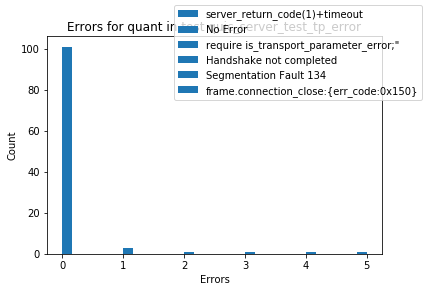

[0, 1, 2, 0, 3, 0, 1, 3, 1, 4, 1, 3, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 0, 3, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 2, 3, 4, 1, 0, 0, 1, 1, 3, 0, 4, 1, 2, 2, 1, 2, 0, 2, 0, 0, 2, 3, 4, 2, 0, 1, 4, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 3, 3, 1, 4, 1, 1, 1, 3, 1, 4, 2, 0, 1, 1, 2, 3, 0, 4]
quic_server_test_stream
quant
['require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"', 'Handshake not completed', 'No Error', 'require ~path_challenge_pending(dcid,f.data);"', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


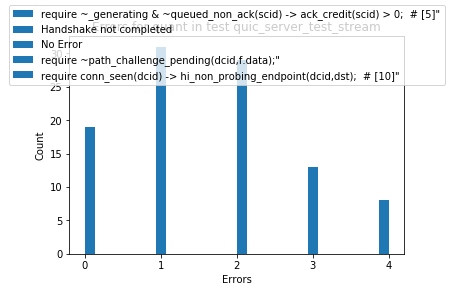

[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
quic_server_test_double_tp_error
quant
['No Error', 'server_return_code(1)+timeout']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


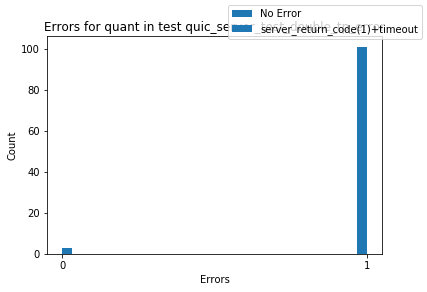

[0, 0, 0, 1, 1, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_acticoid_error
quant
['No Error', 'Handshake not completed', 'Segmentation Fault 134', 'frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


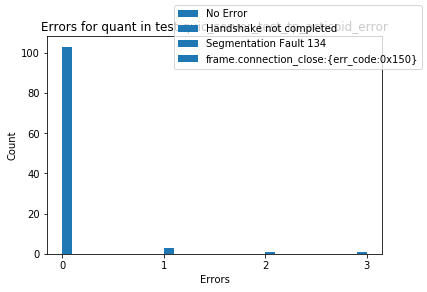

[0, 1, 2, 3, 2, 3, 0, 4, 1, 1, 5, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 5, 0, 1, 0, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 5, 1, 1, 1, 1]
quic_server_test_unkown
quant
['require is_frame_encoding_error;"', 'Handshake not completed', 'No Error', 'frame.connection_close:{err_code:0xa}', 'frame.connection_close:{err_code:0x150}', 'Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


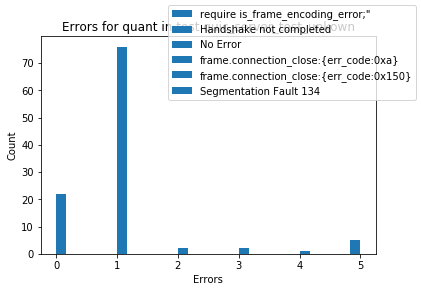

[0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 3, 1, 2, 4, 1, 0, 0, 3, 1, 0, 5, 0, 0, 1, 0, 0, 5, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 5, 1, 5, 1, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 4, 1, 0, 0, 3, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 0, 0, 0, 0, 1, 5, 0, 1, 1, 1, 0, 1, 0, 0, 3, 5, 0, 0, 1, 2]
quic_server_test_accept_maxdata
quant
['No Error', 'require ~path_challenge_pending(dcid,f.data);"', 'require conn_total_data(the_cid) > 0;"', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"', 'Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


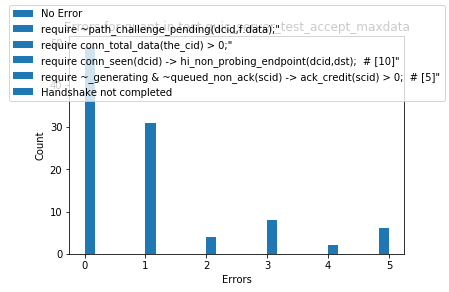

[0, 0, 1, 0, 0, 1, 0, 2, 3, 0, 0, 3, 4, 0, 0, 0, 3, 0, 3, 3, 1, 1, 0, 1, 1, 5, 0, 5, 0, 1, 0, 3, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 3, 1, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 0, 5, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 1, 0, 1, 0, 1, 7, 0, 0, 0, 5, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
quic_server_test_connection_close
quant
['Handshake not completed', 'No Error', 'require is_no_error"', 'require ~path_challenge_pending(dcid,f.data);"', 'require ~draining_pkt_sent(scid) & queued_close(scid);"', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require e ~= quic_packet_type.initial;"', 'Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


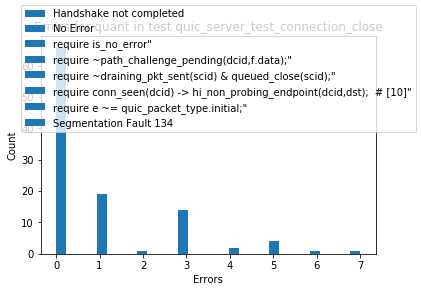

[0, 1, 1, 2, 3, 3, 1, 4, 0, 0, 0, 3, 0, 3, 3, 0, 5, 3, 3, 0, 3, 3, 0, 3, 3, 5, 3, 0, 5, 3, 0, 3, 3, 2, 0, 3, 0, 0, 0, 2, 3, 0, 5, 3, 2, 3, 0, 0, 0, 3, 3, 2, 3, 2, 5, 0, 3, 0, 5, 3, 3, 0, 3, 2, 2, 3, 3, 0, 5, 3, 5, 5, 3, 5, 3, 0, 6, 3, 5, 0, 3, 0, 3, 5, 3, 0, 0, 3, 0, 0, 3, 2, 3, 3, 3, 3, 3, 3, 5, 3, 3, 5, 0, 3, 5, 3, 2, 5]
quic_server_test_blocked_streams_maxstream_error
quant
['require ~path_challenge_pending(dcid,f.data);"', 'No Error', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'Handshake not completed', 'frame.connection_close:{err_code:0x150}', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"', 'require is_frame_encoding_error | is_stream_limit_error;"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


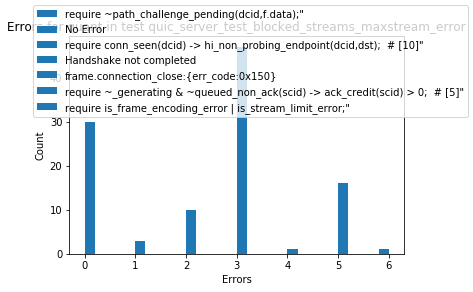

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_no_icid
quant
['server_return_code(1)+timeout']
GOOD
(0.0, 0.3, 1.0, 1.0)


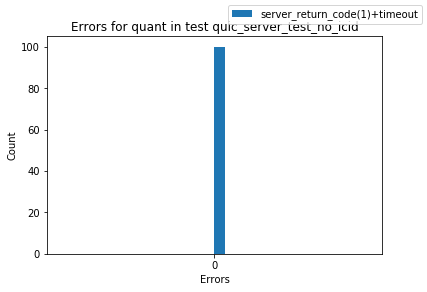

[0, 1, 2, 3, 4, 2, 4, 5, 6, 2, 0, 4, 0, 0, 7, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 6, 0, 0, 4, 0, 0, 0, 0, 0, 2, 4, 6, 4, 0, 0, 0, 6, 0, 0, 0, 0, 2, 0, 0, 6, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 4, 0, 4, 0, 0, 0, 0, 0, 4, 0, 2, 2, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0]
quic_server_test_reset_stream
quant
['frame.connection_close:{err_code:0x5}', 'require stream_id_allowed(dcid,f.id);  # [6]"', 'No Error', 'require stream_id_allowed(dcid,f.id);  # [4]"', 'Handshake not completed', 'frame.connection_close:{err_code:0x150}', 'require ~path_challenge_pending(dcid,f.data);"', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


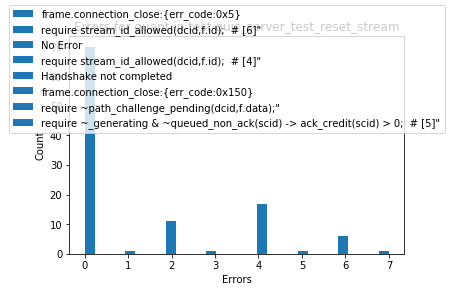

[0, 1, 0, 2, 1, 0, 1, 3, 2, 4, 0, 2, 0, 1, 5, 1, 5, 5, 2, 1, 1, 4, 0, 0, 5, 0, 1, 5, 5, 4, 1, 4, 5, 0, 1, 4, 5, 1, 1, 4, 5, 4, 0, 0, 0, 2, 0, 0, 4, 4, 1, 5, 0, 1, 5, 5, 0, 5, 5, 4, 1, 1, 1, 4, 5, 4, 0, 2, 5, 0, 1, 0, 1, 0, 4, 1, 5, 5, 1, 0, 5, 0, 5, 5, 4, 1, 1, 2, 5, 5, 1, 5, 0, 4, 4, 2, 1, 1, 5, 1, 1, 2, 1, 0, 1, 1, 4, 1]
quic_server_test_tp_limit_newcoid
quant
['No Error', 'Handshake not completed', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'frame.connection_close:{err_code:0x150}', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"', 'require ~path_challenge_pending(dcid,f.data);"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


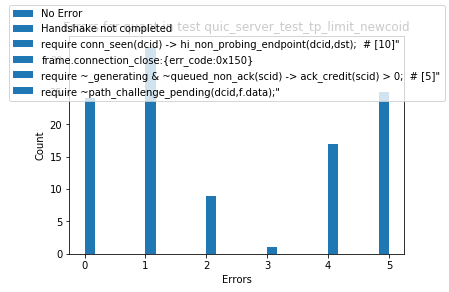

[0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]
quic_server_test_ext_min_ack_delay
quant
['No Error', 'require ~path_challenge_pending(dcid,f.data);"', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


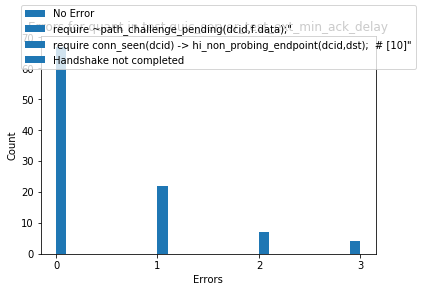

[0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0]
quic_server_test_retirecoid_error
quant
['Handshake not completed', 'No Error', 'frame.connection_close:{err_code:0x150}', 'require ~path_challenge_pending(dcid,f.data);"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


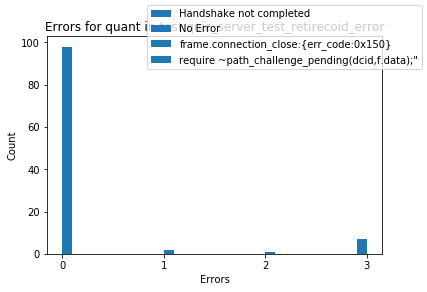

[0, 1, 0, 0, 1, 0, 1, 2, 3, 4, 0, 0, 4, 0, 5, 0, 0, 0, 0, 0, 0, 4, 5, 0, 0, 3, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 3, 1, 0, 1, 5, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 3, 3, 4, 5, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 1, 3, 1, 1, 3, 0, 4, 0, 5, 1, 0, 0, 5, 0, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 1, 0]
quic_server_test_max
quant
['No Error', 'Handshake not completed', 'frame.connection_close:{err_code:0x150}', 'require ~path_challenge_pending(dcid,f.data);"', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


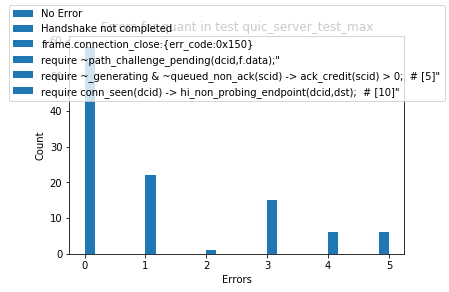

[0, 1, 1, 1, 2, 1, 1, 3, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
quic_server_test_handshake_done_error
quant
['Handshake not completed', 'No Error', 'frame.connection_close:{err_code:0x7}', 'frame.connection_close:{err_code:0x150}', 'require is_protocol_violation"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


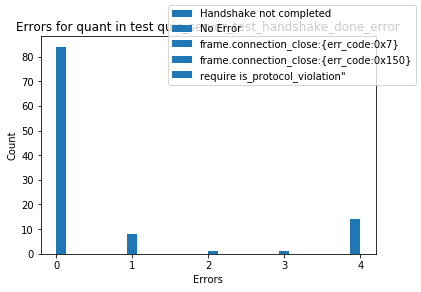

[0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_token_error
quant
['Handshake not completed', 'No Error', 'frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


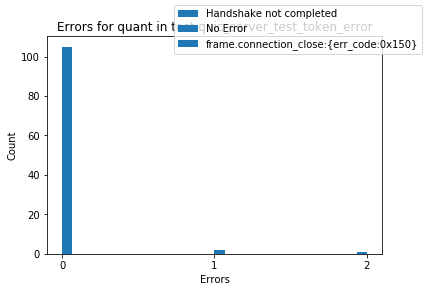

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_error
quinn
['No Error']
GOOD
(0.0, 0.3, 1.0, 1.0)


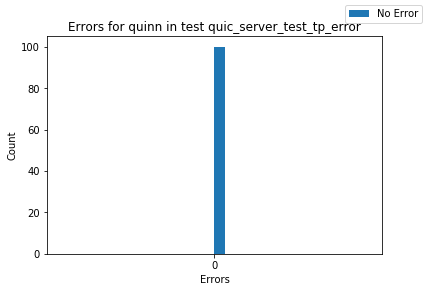

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0]
quic_server_test_stream
quinn
['Handshake not completed', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"', 'require ~path_challenge_pending(dcid,f.data);"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


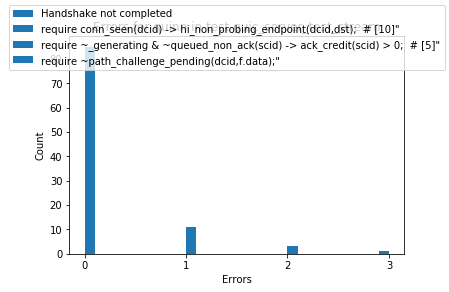

[0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_double_tp_error
quinn
['No Error', 'Handshake not completed', 'Segmentation Fault 134', 'frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


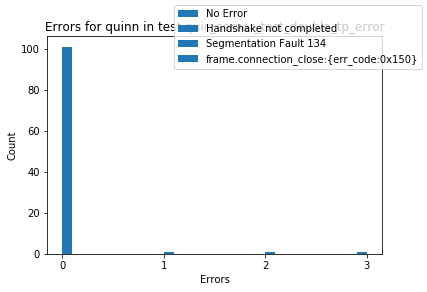

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_acticoid_error
quinn
['No Error']
GOOD
(0.0, 0.3, 1.0, 1.0)


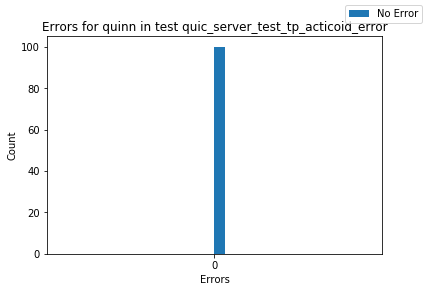

[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0]
quic_server_test_unkown
quinn
['No Error', 'Handshake not completed', 'require is_frame_encoding_error;"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


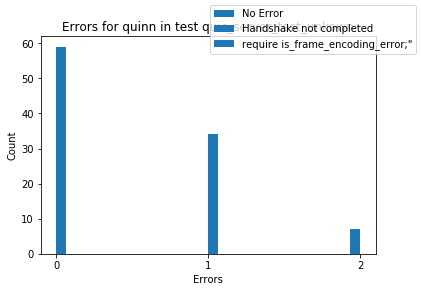

[0, 1, 0, 2, 3, 2, 3, 4, 1, 5, 6, 1, 5, 5, 6, 6, 3, 5, 6, 6, 6, 1, 1, 6, 3, 5, 6, 3, 1, 6, 2, 3, 1, 6, 5, 7, 1, 1, 1, 6, 5, 6, 6, 3, 5, 1, 1, 6, 6, 5, 1, 6, 1, 1, 1, 6, 5, 1, 3, 6, 1, 6, 6, 2, 5, 1, 6, 2, 3, 6, 5, 2, 2, 6, 6, 5, 2, 1, 5, 2, 5, 1, 2, 3, 1, 2, 3, 6, 2, 3, 3, 6, 5, 2, 3, 6, 1, 5, 3, 2, 1, 6, 5, 3, 1, 1, 1, 1]
quic_server_test_accept_maxdata
quinn
['No Error', 'require ~path_challenge_pending(dcid,f.data);"', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'Handshake not completed', 'frame.connection_close:{err_code:0x150}', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"', 'require conn_total_data(the_cid) > 0;"', 'require stream_id_allowed(dcid,f.id);  # [6]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


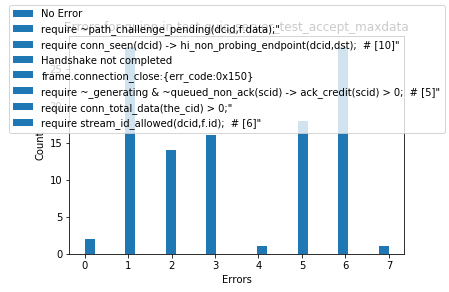

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0]
quic_server_test_connection_close
quinn
['Handshake not completed', 'require ~path_challenge_pending(dcid,f.data);"', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


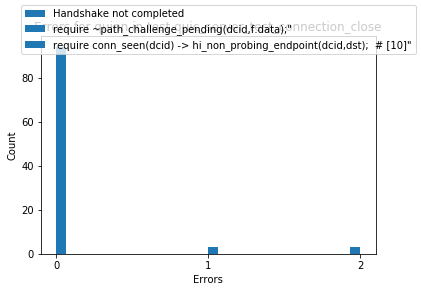

[0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_blocked_streams_maxstream_error
quinn
['No Error', 'Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


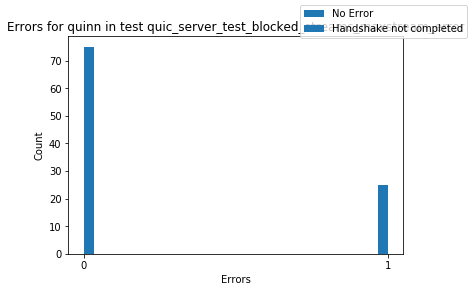

[0, 1, 1, 1, 1, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
quic_server_test_no_icid
quinn
['server_return_code(1)+timeout', 'No Error', '', 'Segmentation Fault 134', 'frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


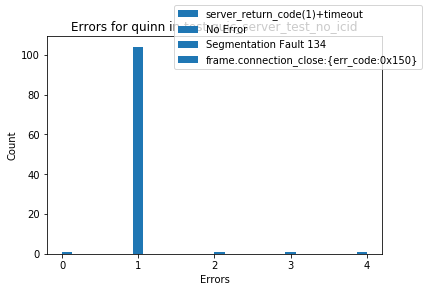

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
quic_server_test_reset_stream
quinn
['require stream_id_allowed(dcid,f.id);  # [6]"', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'Handshake not completed', 'require ~path_challenge_pending(dcid,f.data);"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


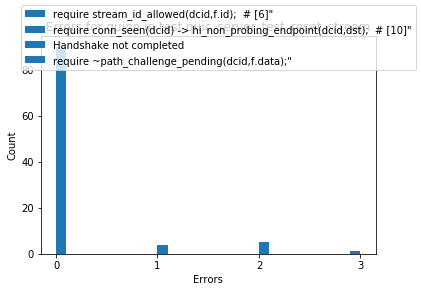

[0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_limit_newcoid
quinn
['Handshake not completed', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require ~path_challenge_pending(dcid,f.data);"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


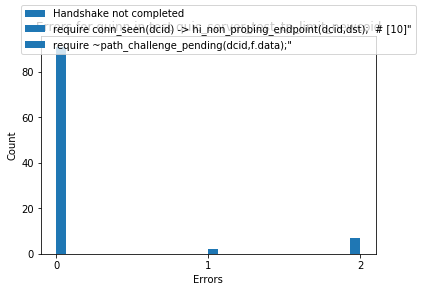

[0, 1, 2, 2, 1, 2, 1, 3, 1, 1, 4, 1, 5, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 5, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
quic_server_test_ext_min_ack_delay
quinn
['require ~path_challenge_pending(dcid,f.data);"', 'Handshake not completed', 'No Error', 'frame.connection_close:{err_code:0x150}', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"', 'Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


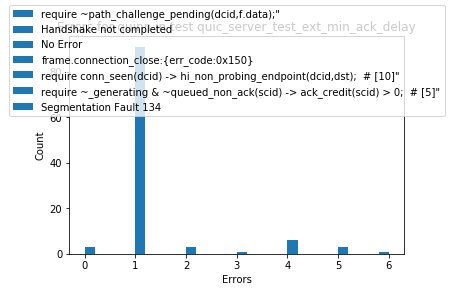

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_retirecoid_error
quinn
['Handshake not completed', 'frame.connection_close:{err_code:0x7}', 'require ~path_challenge_pending(dcid,f.data);"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


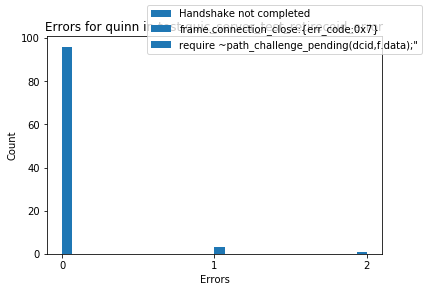

[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 4, 4, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0]
quic_server_test_max
quinn
['Handshake not completed', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"', 'require conn_total_data(the_cid) > 0;"', 'require ~path_challenge_pending(dcid,f.data);"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


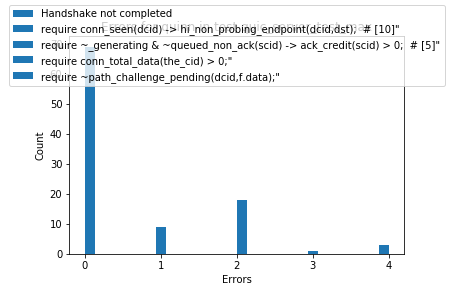

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
quic_server_test_handshake_done_error
quinn
['No Error', 'require is_protocol_violation"', 'Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


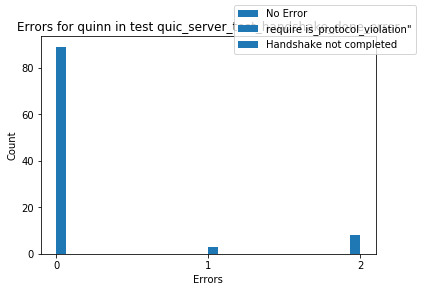

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_token_error
quinn
['Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)


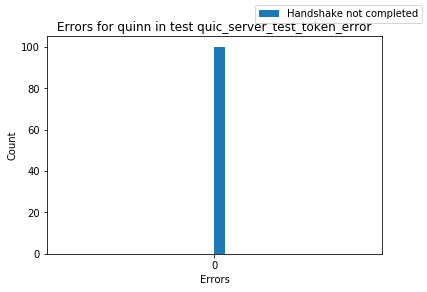

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_error
mvfst
['No Error', 'frame.connection_close:{err_code:0x8}']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


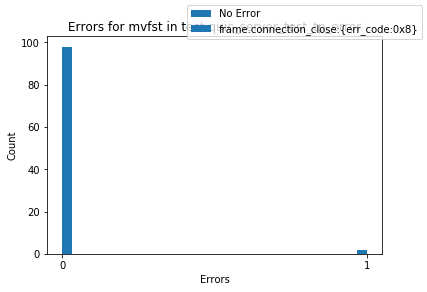

[0, 1, 2, 2, 3, 2, 3, 3, 0, 2, 3, 2, 0, 3, 3, 0, 0, 2, 3, 3, 0, 3, 2, 0, 2, 2, 3, 3, 0, 0, 0, 2, 0, 2, 2, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 2, 2, 2, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 3, 3, 2, 3, 3, 0, 3, 0, 2, 2, 0, 2, 2, 3, 2, 2, 0, 3, 0, 0, 3, 0, 2, 0]
quic_server_test_stream
mvfst
['Handshake not completed', 'Segmentation Fault 134', 'frame.connection_close:{err_code:0xc}', 'No Error']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


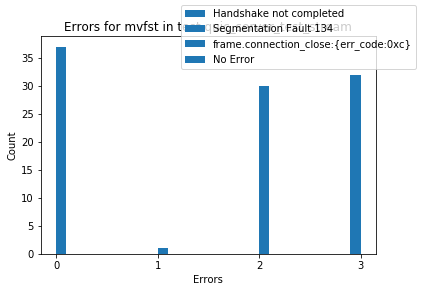

[0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1]
quic_server_test_double_tp_error
mvfst
['frame.connection_close:{err_code:0xc}', 'Handshake not completed', 'Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


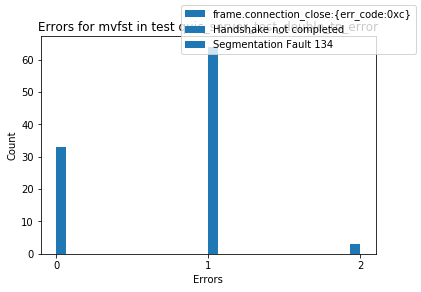

[0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
quic_server_test_tp_acticoid_error
mvfst
['frame.connection_close:{err_code:0xc}', 'Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


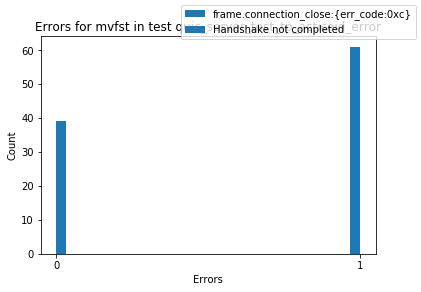

[0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 3, 0, 0, 0, 2, 2, 3, 2, 2, 0, 0, 0, 1, 3, 3, 0, 0, 2, 0, 3, 2, 3, 0, 2, 0, 1, 0, 3, 2, 0, 2, 3, 3, 0, 1, 2, 3, 2, 2, 3, 0, 1, 0, 3, 2, 0, 0, 2, 0, 3, 3, 3, 0, 1, 3, 3, 3, 2, 0, 3, 1, 1, 3, 1, 1, 3, 2, 0, 0, 3, 1, 3, 2, 3, 0, 1, 0, 3, 2, 2, 2, 3, 3, 3, 0, 2]
quic_server_test_unkown
mvfst
['No Error', 'require is_frame_encoding_error;"', 'Segmentation Fault 139', 'Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


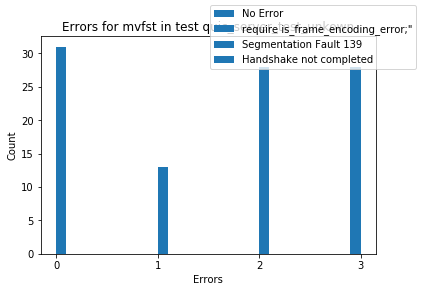

[0, 1, 0, 0, 1, 2, 3, 2, 0, 2, 1, 0, 3, 2, 2, 0, 2, 1, 3, 3, 0, 1, 0, 2, 0, 3, 0, 1, 3, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 3, 1, 0, 0, 2, 3, 1, 1, 1, 0, 3, 1, 1, 3, 1, 2, 2, 0, 3, 2, 0, 1, 0, 2, 1, 2, 1, 2, 1, 3, 0, 0, 3, 2, 1, 3, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 1, 1, 3, 2, 2, 2, 0]
quic_server_test_accept_maxdata
mvfst
['require conn_total_data(the_cid) > 0;"', 'No Error', 'frame.connection_close:{err_code:0xc}', 'Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


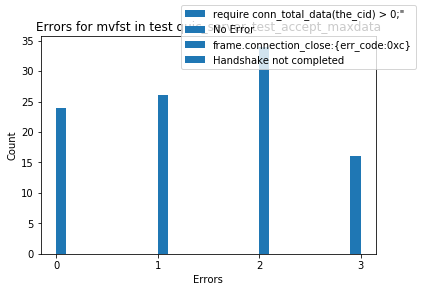

[0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 3, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
quic_server_test_connection_close
mvfst
['require is_no_error"', 'Handshake not completed', 'No Error', 'require connected(dcid) & connected_to(dcid) = scid;"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


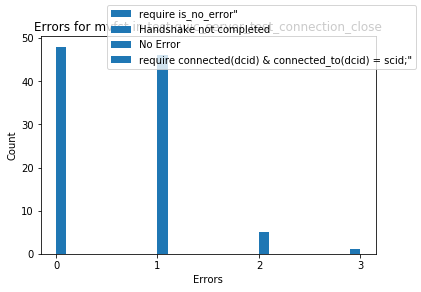

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
quic_server_test_blocked_streams_maxstream_error
mvfst
['Handshake not completed', 'frame.connection_close:{err_code:0xc}', 'Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


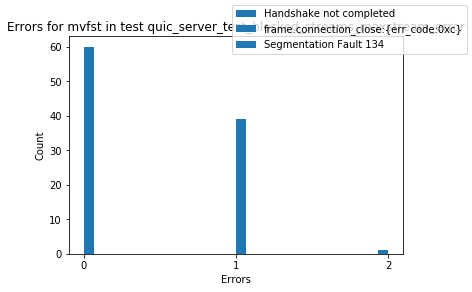

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_no_icid
mvfst
['No Error']
GOOD
(0.0, 0.3, 1.0, 1.0)


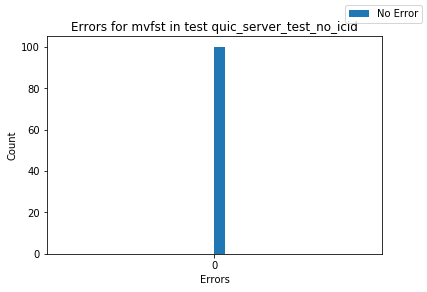

[0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0, 3, 1, 0, 1, 2, 2, 1, 2, 0, 0, 3, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1, 0]
quic_server_test_reset_stream
mvfst
['Handshake not completed', 'frame.connection_close:{err_code:0xc}', 'No Error', 'Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


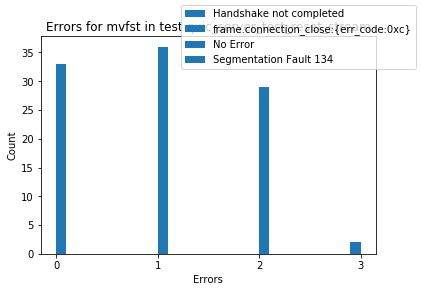

[0, 1, 0, 2, 3, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 3, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 2]
quic_server_test_tp_limit_newcoid
mvfst
['frame.connection_close:{err_code:0xc}', 'No Error', 'Handshake not completed', 'Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


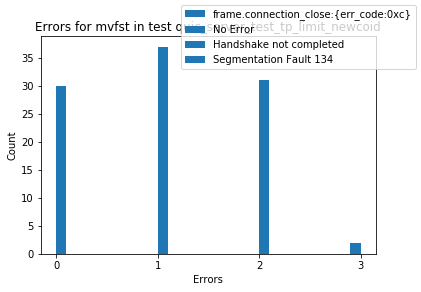

[0, 1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 3, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 3, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1]
quic_server_test_ext_min_ack_delay
mvfst
['No Error', 'Handshake not completed', 'frame.connection_close:{err_code:0xc}', 'Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


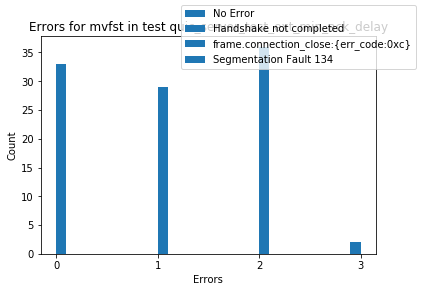

[0, 1, 2, 1, 1, 2, 3, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2]
quic_server_test_retirecoid_error
mvfst
['No Error', 'Handshake not completed', 'frame.connection_close:{err_code:0xc}', 'Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


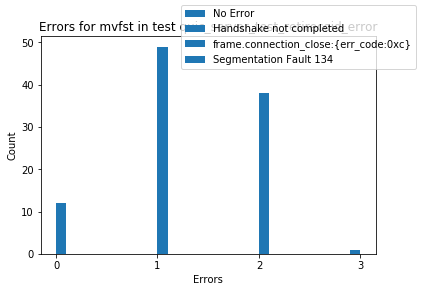

[0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 3, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2]
quic_server_test_max
mvfst
['No Error', 'frame.connection_close:{err_code:0xc}', 'Handshake not completed', 'Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


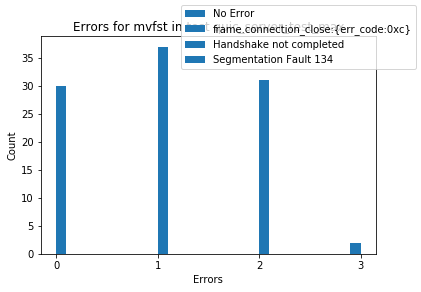

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0]
quic_server_test_handshake_done_error
mvfst
['Segmentation Fault 139', 'require is_protocol_violation"', 'Handshake not completed', 'No Error']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


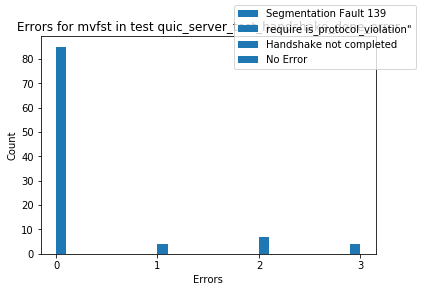

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_token_error
mvfst
['Handshake not completed', 'frame.connection_close:{err_code:0x1}']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


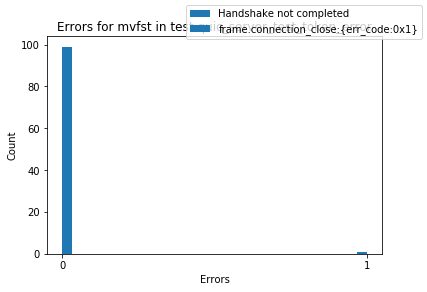

[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
quic_server_test_tp_error
picoquic
['Handshake not completed', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require is_transport_parameter_error;"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


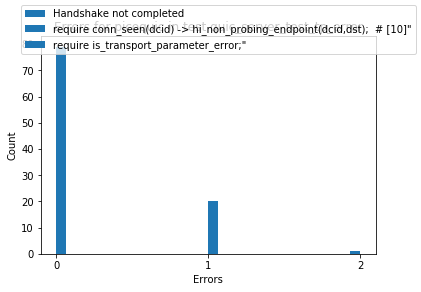

[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]
quic_server_test_stream
picoquic
['No Error', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


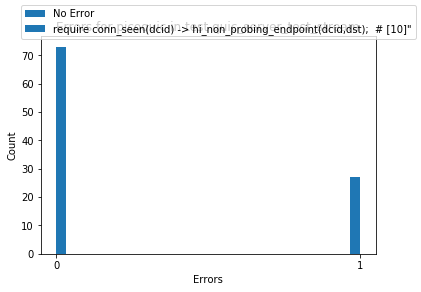

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_double_tp_error
picoquic
['No Error']
GOOD
(0.0, 0.3, 1.0, 1.0)


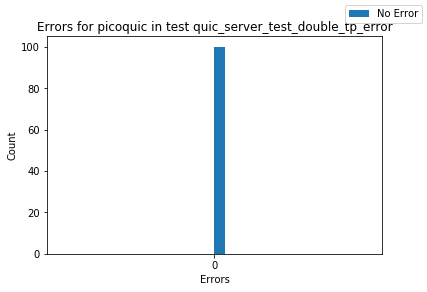

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_acticoid_error
picoquic
['Handshake not completed', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require is_transport_parameter_error;"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


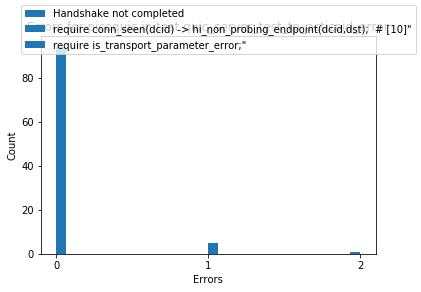

[0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1]
quic_server_test_unkown
picoquic
['frame.connection_close:{err_code:0xa}', 'Handshake not completed', 'require is_frame_encoding_error;"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


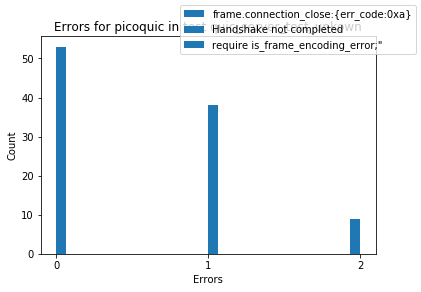

[0, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 3, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 3, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1]
quic_server_test_accept_maxdata
picoquic
['require conn_total_data(the_cid) > 0;"', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'No Error', 'Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


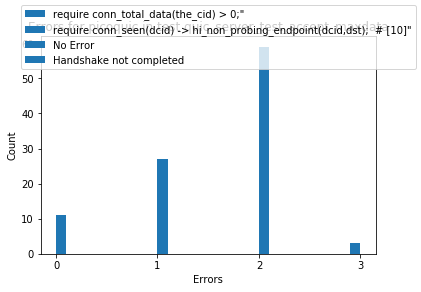

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]
quic_server_test_connection_close
picoquic
['Handshake not completed', 'No Error', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


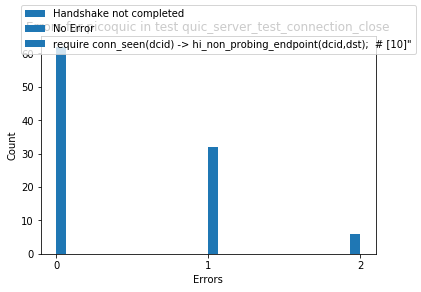

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1]
quic_server_test_blocked_streams_maxstream_error
picoquic
['Handshake not completed', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require is_frame_encoding_error | is_stream_limit_error;"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


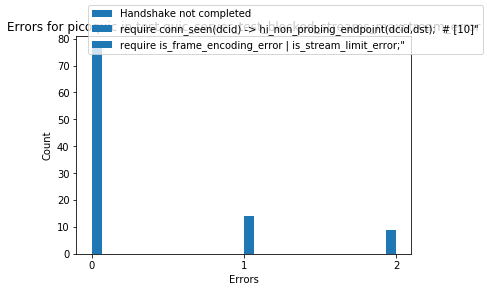

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_no_icid
picoquic
['No Error']
GOOD
(0.0, 0.3, 1.0, 1.0)


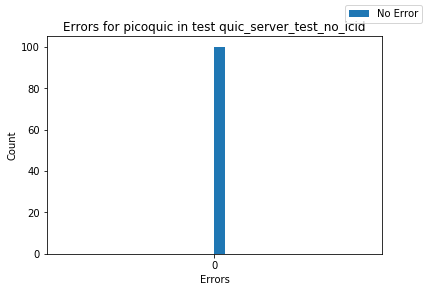

[0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 3, 3, 1, 2, 2, 0, 0, 3, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 3, 0, 0, 2, 2, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 2, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0]
quic_server_test_reset_stream
picoquic
['require stream_id_allowed(dcid,f.id);  # [4]"', 'No Error', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


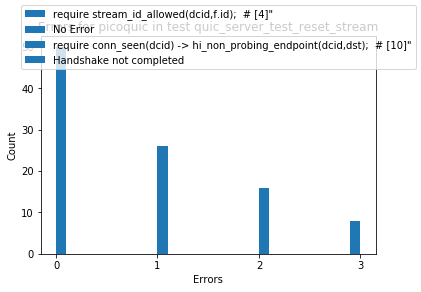

[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_limit_newcoid
picoquic
['No Error', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


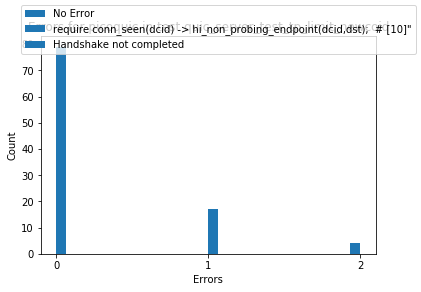

[0, 0, 1, 1, 0, 2, 0, 3, 2, 3, 1, 1, 1, 2, 3, 3, 0, 1, 0, 1, 3, 2, 2, 2, 2, 3, 0, 3, 2, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 2, 0, 1, 1, 2, 3, 3, 1, 1, 2, 2, 0, 1, 2, 0, 3, 2, 2, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 0, 0, 3, 3, 3, 2, 3, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 3, 1, 2]
quic_server_test_ext_min_ack_delay
picoquic
['require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require f.seq_num > last_ack_freq_seq(scid);"', 'Handshake not completed', 'No Error']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


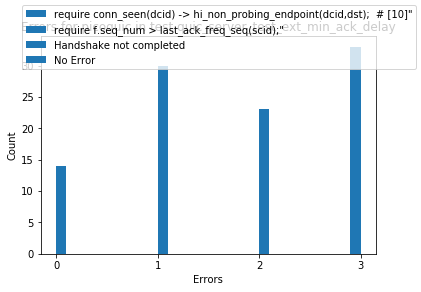

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0]
quic_server_test_retirecoid_error
picoquic
['No Error', 'frame.connection_close:{err_code:0xa}', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


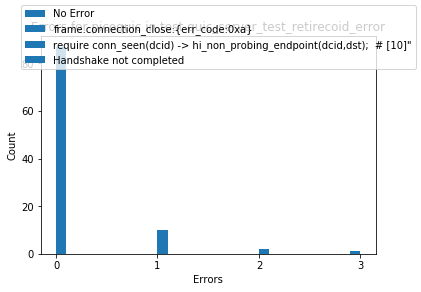

[0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0]
quic_server_test_max
picoquic
['No Error', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


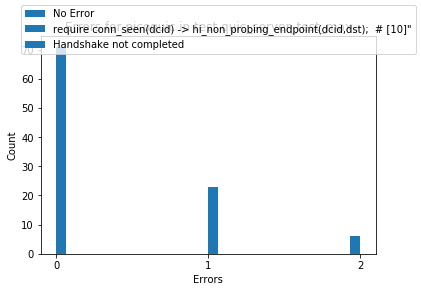

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
quic_server_test_handshake_done_error
picoquic
['No Error', 'Handshake not completed', 'require is_protocol_violation"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


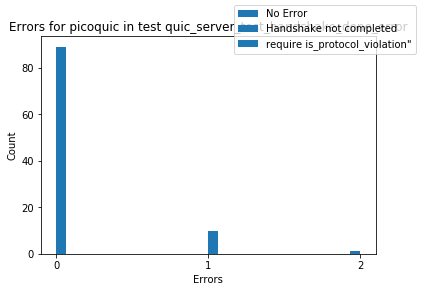

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_token_error
picoquic
['No Error']
GOOD
(0.0, 0.3, 1.0, 1.0)


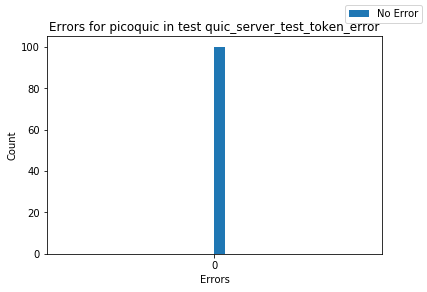

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_error
quic-go
['No Error']
GOOD
(0.0, 0.3, 1.0, 1.0)


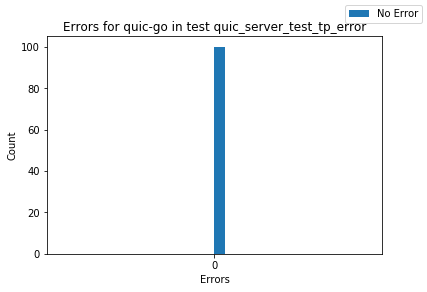

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_stream
quic-go
['Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)


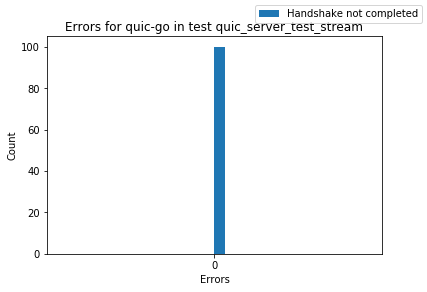

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_double_tp_error
quic-go
['No Error']
GOOD
(0.0, 0.3, 1.0, 1.0)


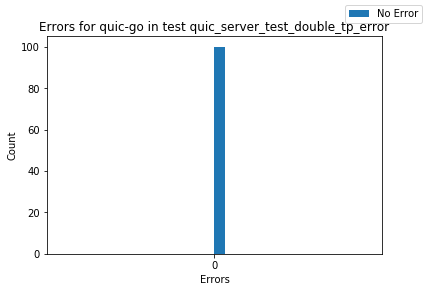

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_acticoid_error
quic-go
['Handshake not completed', 'Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


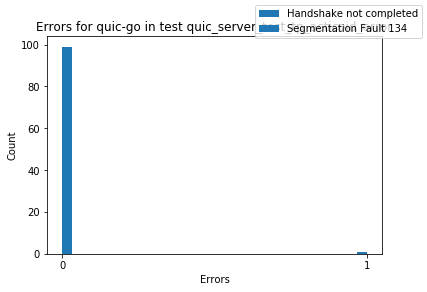

[0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0]
quic_server_test_unkown
quic-go
['No Error', 'Handshake not completed', 'require is_frame_encoding_error;"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


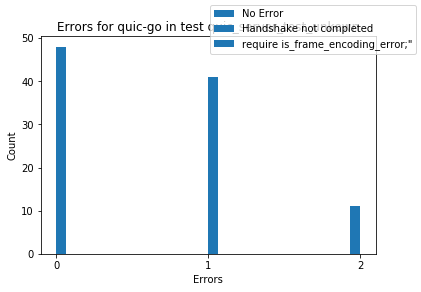

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_accept_maxdata
quic-go
['Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)


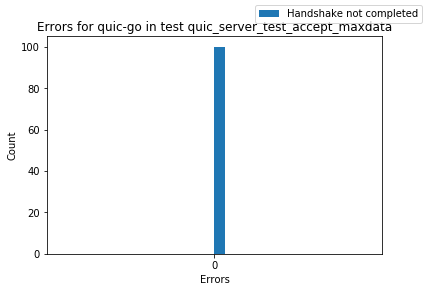

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_connection_close
quic-go
['Handshake not completed', 'require conn_total_data(the_cid) > 0;"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


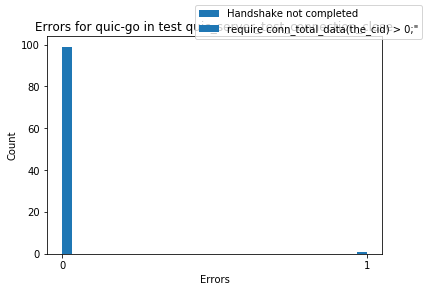

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_blocked_streams_maxstream_error
quic-go
['Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)


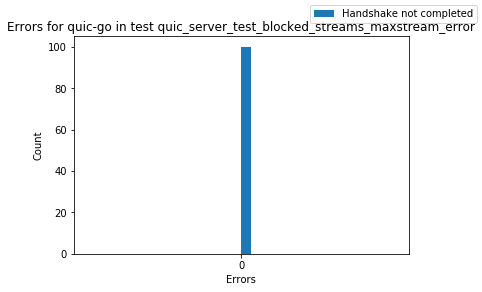

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_no_icid
quic-go
['No Error']
GOOD
(0.0, 0.3, 1.0, 1.0)


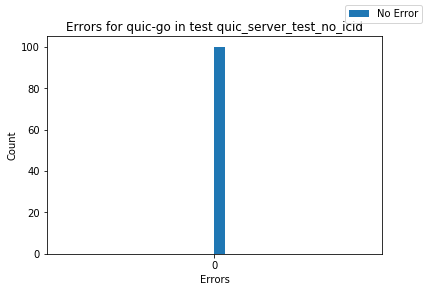

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_reset_stream
quic-go
['Handshake not completed', 'Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


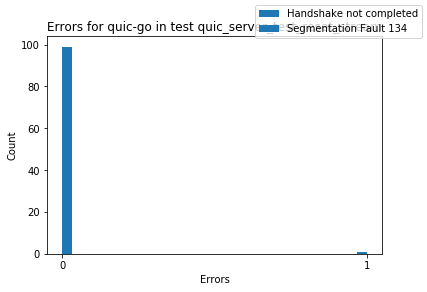

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_limit_newcoid
quic-go
['Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)


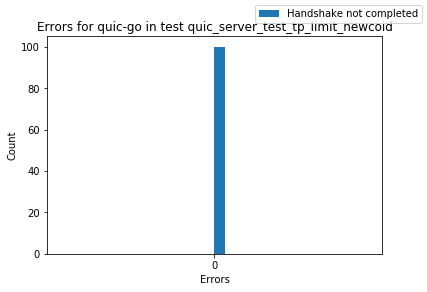

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_ext_min_ack_delay
quic-go
['Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)


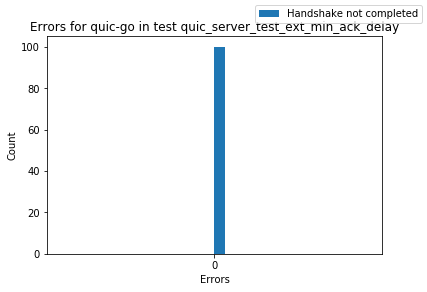

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_retirecoid_error
quic-go
['Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)


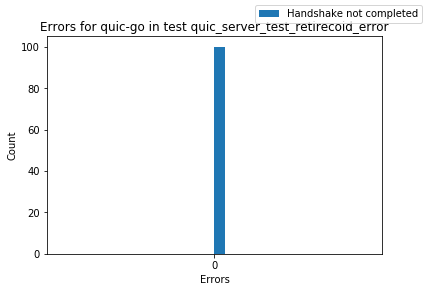

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_max
quic-go
['Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)


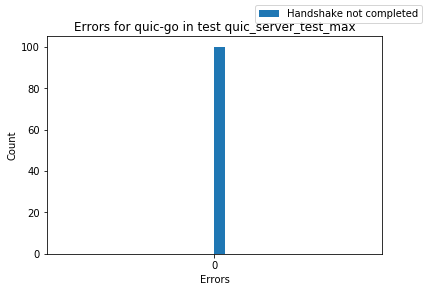

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
quic_server_test_handshake_done_error
quic-go
['frame.connection_close:{err_code:0x7}', 'Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


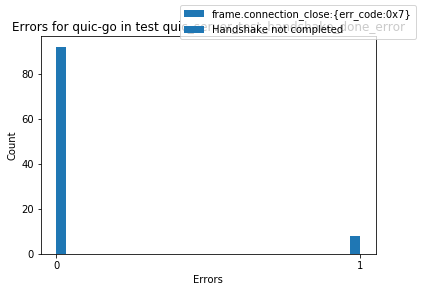

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_token_error
quic-go
['Handshake not completed', 'Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


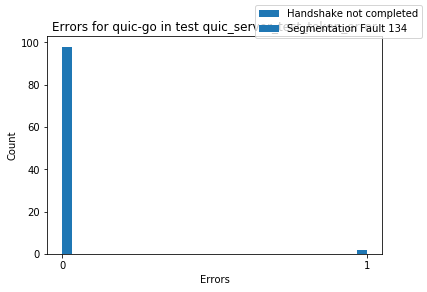

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_error
aioquic
['Handshake not completed', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


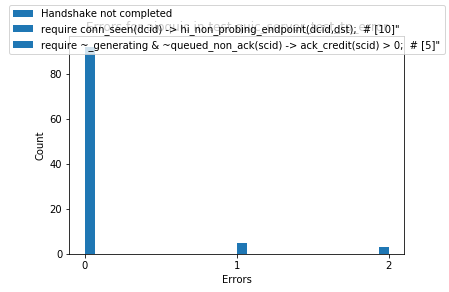

[0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
quic_server_test_stream
aioquic
['No Error', 'Handshake not completed', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


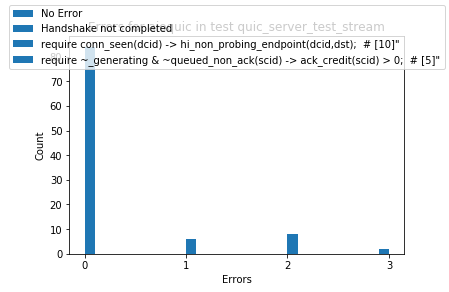

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_double_tp_error
aioquic
['Handshake not completed', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


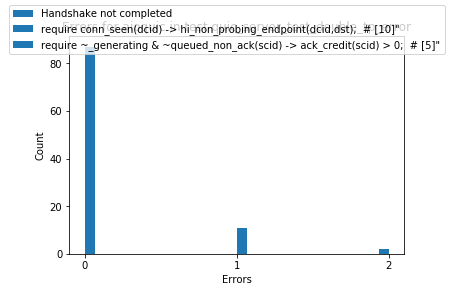

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_acticoid_error
aioquic
['Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)


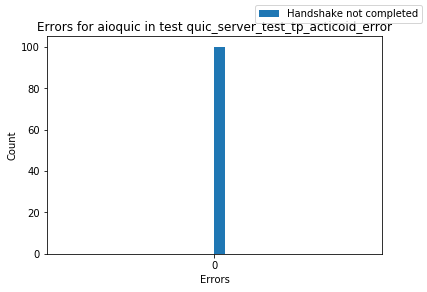

[0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1]
quic_server_test_unkown
aioquic
['Handshake not completed', 'frame.connection_close:{err_code:0xa}', 'require is_frame_encoding_error;"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


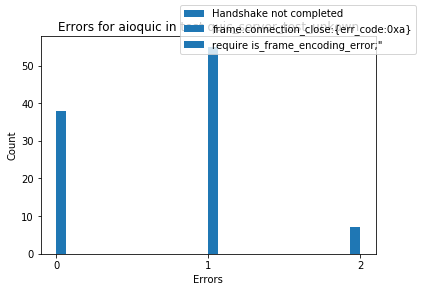

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_accept_maxdata
aioquic
['No Error', 'require conn_total_data(the_cid) > 0;"', 'Handshake not completed', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


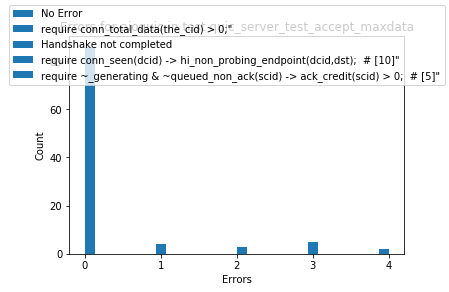

[0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]
quic_server_test_connection_close
aioquic
['Handshake not completed', 'No Error', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


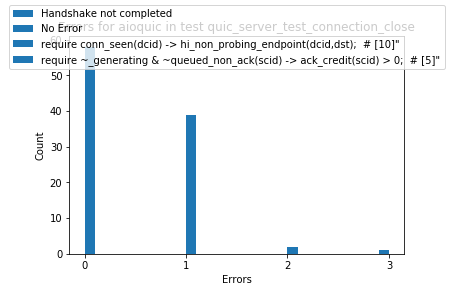

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2]
quic_server_test_blocked_streams_maxstream_error
aioquic
['Handshake not completed', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"', 'require is_frame_encoding_error | is_stream_limit_error;"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


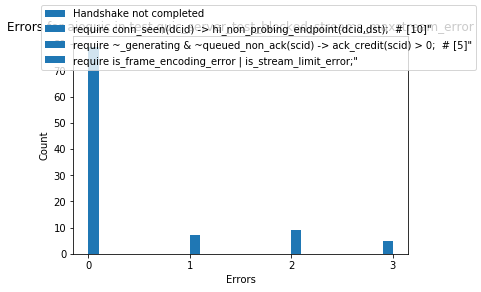

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
quic_server_test_no_icid
aioquic
['', 'Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


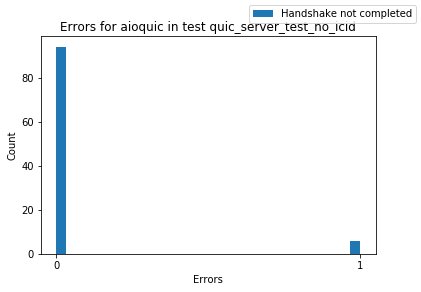

[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2]
quic_server_test_reset_stream
aioquic
['Handshake not completed', 'No Error', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


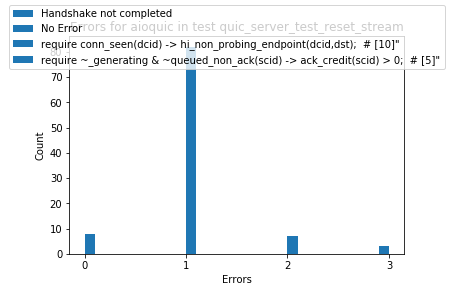

[0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_limit_newcoid
aioquic
['No Error', 'Handshake not completed', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


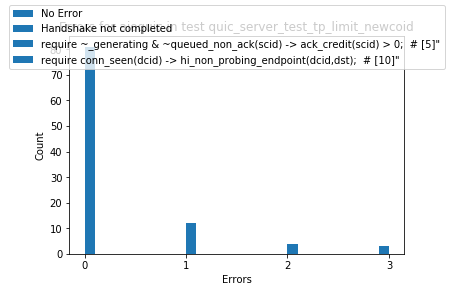

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_ext_min_ack_delay
aioquic
['No Error', 'Handshake not completed', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


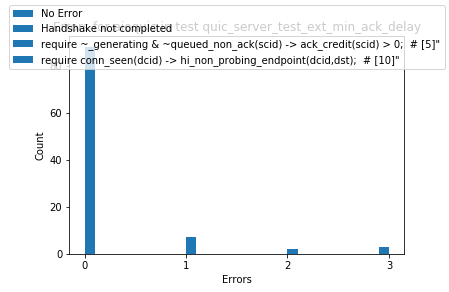

[0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0]
quic_server_test_retirecoid_error
aioquic
['Handshake not completed', 'Segmentation Fault 134', 'require is_protocol_violation"', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


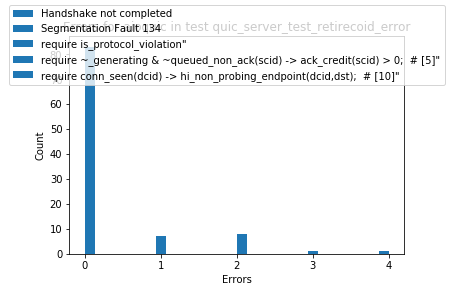

[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0]
quic_server_test_max
aioquic
['No Error', 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"', 'Handshake not completed', 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)
(1.0, 0.40740740740740755, 0.0, 1.0)


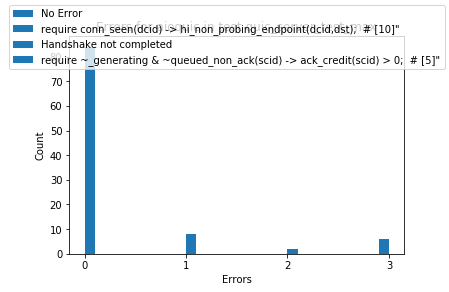

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_handshake_done_error
aioquic
['No Error', 'Handshake not completed', 'require is_protocol_violation"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


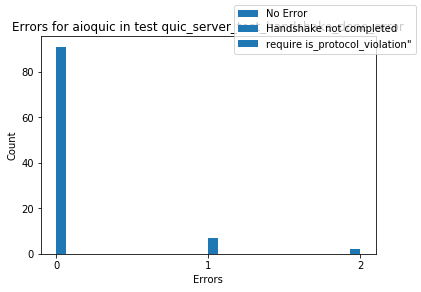

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_token_error
aioquic
['Handshake not completed']
GOOD
(0.0, 0.3, 1.0, 1.0)


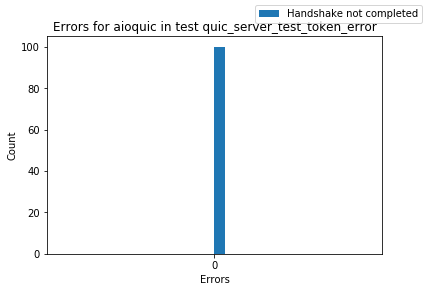

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_error
quiche
['Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)


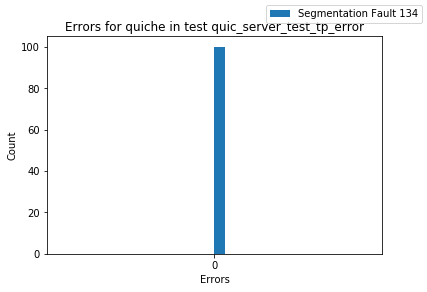

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
quic_server_test_stream
quiche
['No error', 'Segmentation Fault 134', '    require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]\n"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)
(0.8064516129032256, 1.0, 0.16129032258064513, 1.0)


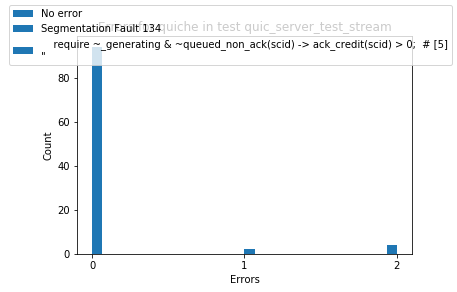

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_double_tp_error
quiche
['Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)


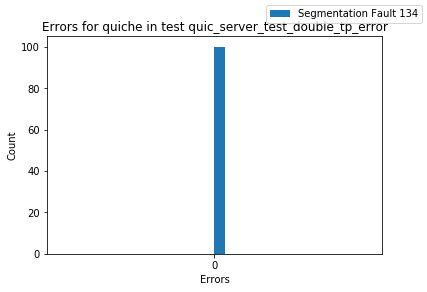

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_acticoid_error
quiche
['Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)


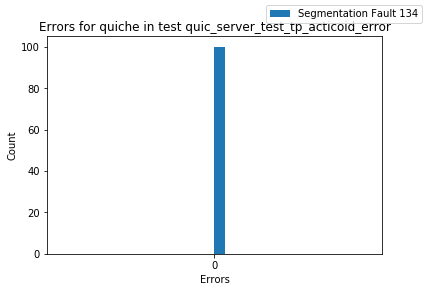

[0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0]
quic_server_test_unkown
quiche
['    require is_frame_encoding_error;\n"', 'No Error']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


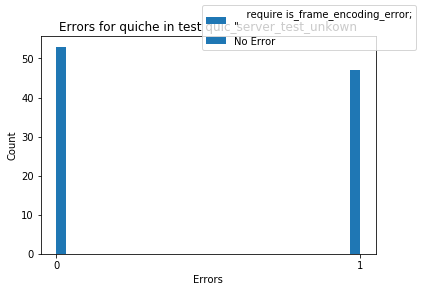

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_accept_maxdata
quiche
['No error', 'frame.connection_close:{err_code:0x5}']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


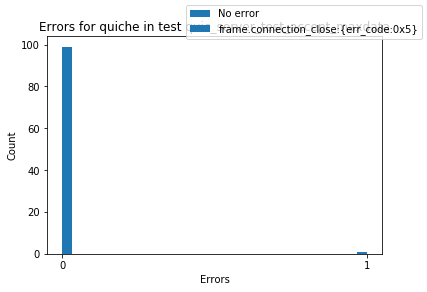

[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1]
quic_server_test_connection_close
quiche
['No error', '    require conn_total_data(the_cid) > 0;\n"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


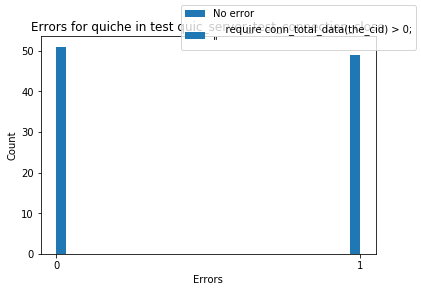

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_blocked_streams_maxstream_error
quiche
['No Error']
GOOD
(0.0, 0.3, 1.0, 1.0)


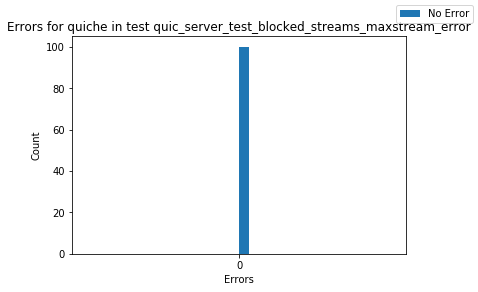

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_no_icid
quiche
['Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)


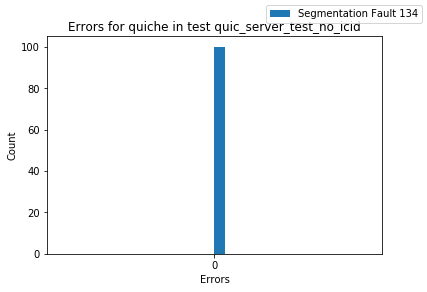

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_reset_stream
quiche
['No error', '    require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]\n"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


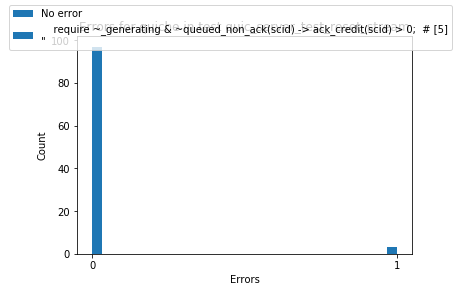

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_limit_newcoid
quiche
['No error', '    require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]\n"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


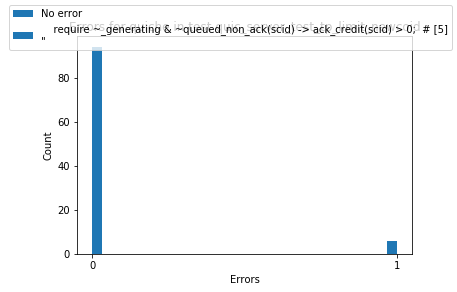

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]
quic_server_test_ext_min_ack_delay
quiche
['No error', '    require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]\n"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


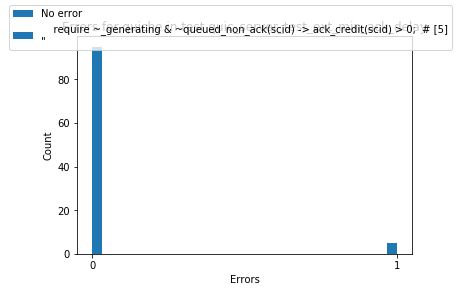

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_retirecoid_error
quiche
['    require is_protocol_violation\n"', '    require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]\n"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


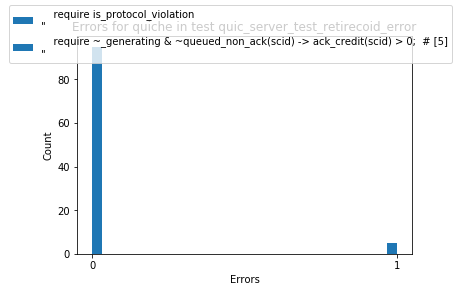

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_max
quiche
['No error']
GOOD
(0.0, 0.3, 1.0, 1.0)


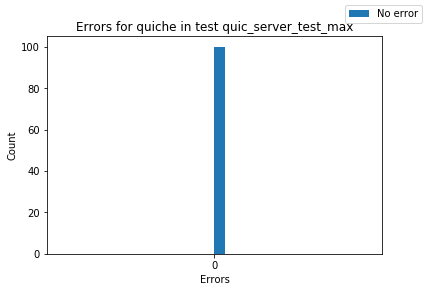

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]
quic_server_test_handshake_done_error
quiche
['No Error', '    require is_protocol_violation\n"']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


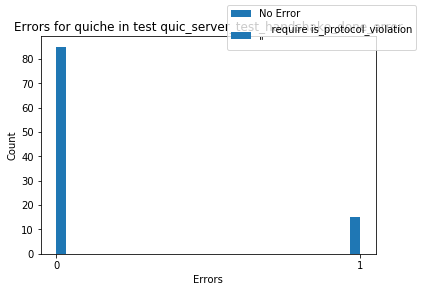

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_token_error
quiche
['    require is_invalid_token;\n"', 'Segmentation Fault 134']
GOOD
(0.0, 0.3, 1.0, 1.0)
(0.16129032258064513, 1.0, 0.8064516129032259, 1.0)


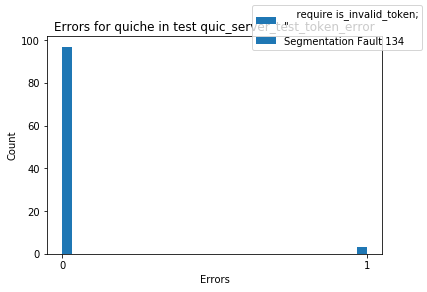

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_error
lsquic
['frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)


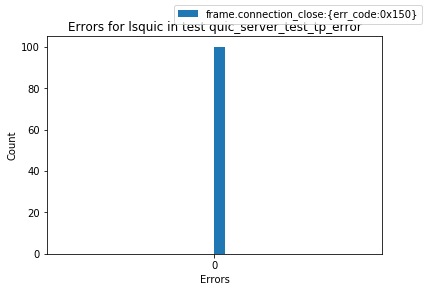

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_stream
lsquic
['frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)


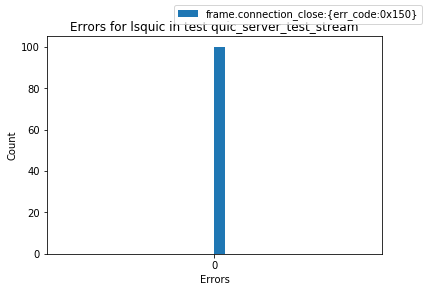

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_double_tp_error
lsquic
['frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)


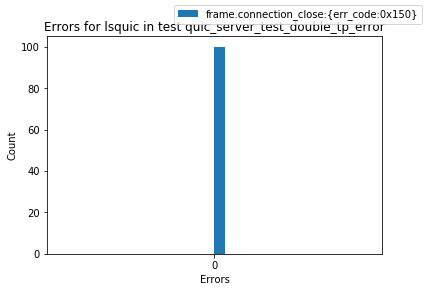

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_acticoid_error
lsquic
['frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)


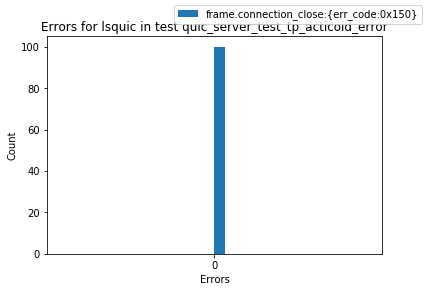

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_unkown
lsquic
['frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)


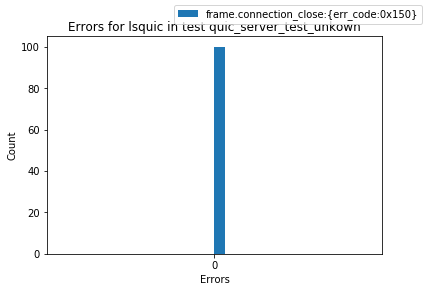

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_accept_maxdata
lsquic
['frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)


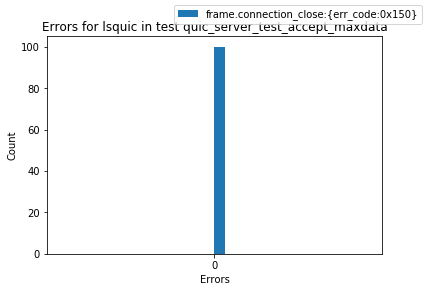

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_connection_close
lsquic
['require is_no_error"']
GOOD
(0.0, 0.3, 1.0, 1.0)


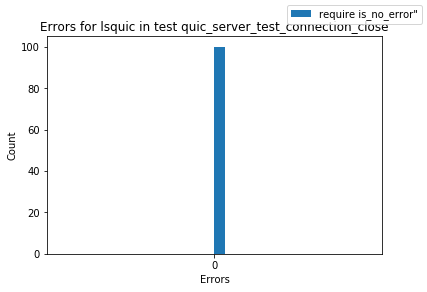

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_blocked_streams_maxstream_error
lsquic
['frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)


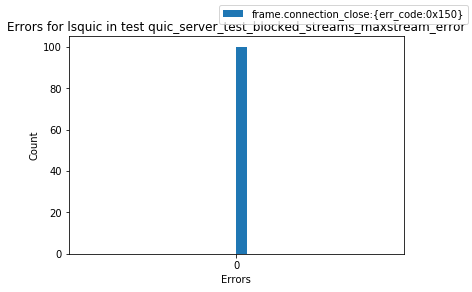

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_no_icid
lsquic
['frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)


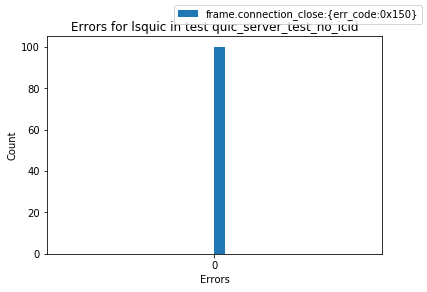

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_reset_stream
lsquic
['frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)


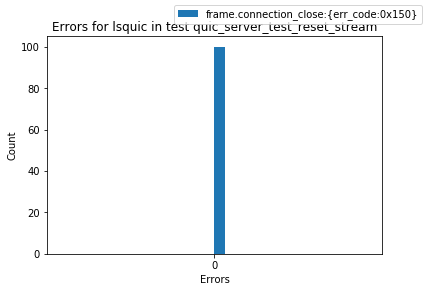

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_tp_limit_newcoid
lsquic
['frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)


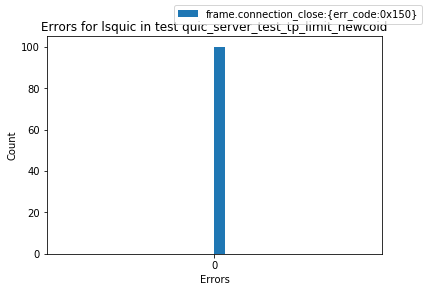

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_ext_min_ack_delay
lsquic
['frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)


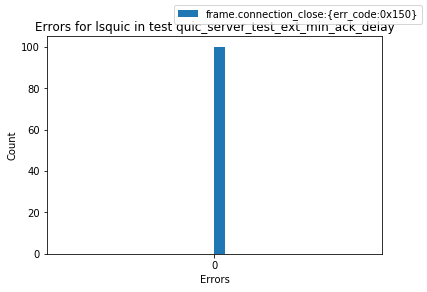

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_retirecoid_error
lsquic
['frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)


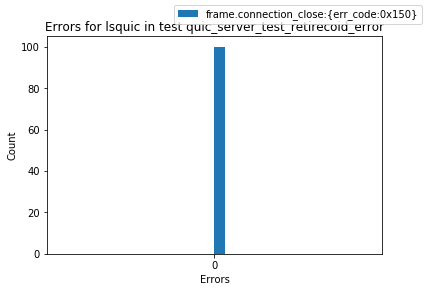

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_max
lsquic
['frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)


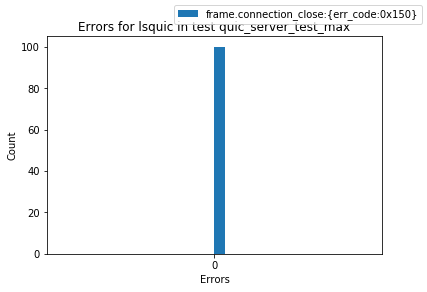

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_handshake_done_error
lsquic
['frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)


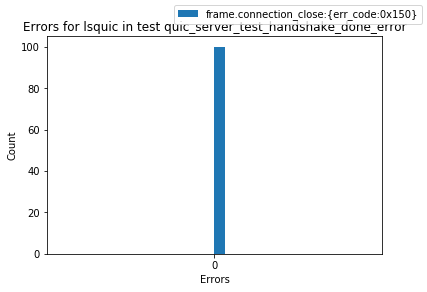

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_token_error
lsquic
['frame.connection_close:{err_code:0x150}']
GOOD
(0.0, 0.3, 1.0, 1.0)


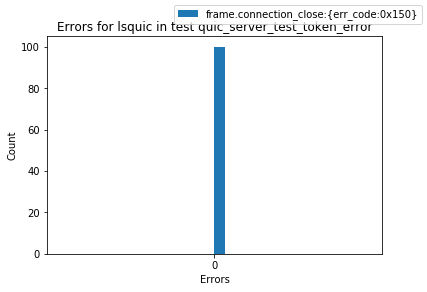

In [13]:
all_errors = train_df["ErrorIEV"].unique().tolist()
tests = train_df.TestName.unique()
res = []
for i, row in train_df.iterrows():
    ind = all_errors.index(row["ErrorIEV"])
    res.append(ind)
train_df["ErrorsCode"] = res


for s in servers:
    subdf = train_df.loc[train_df['Implementation'] == s]
    for t in tests:
        subsubdf = subdf.loc[subdf['TestName'] == t]
        errors = subsubdf["ErrorIEV"].unique()
        
        all_errors = subsubdf["ErrorIEV"].unique().tolist()
        all_errors_ind = {all_errors[x]:x for x in range(len(all_errors))}

        res = []
        for i, row in subsubdf.iterrows():
            ind = all_errors_ind[row["ErrorIEV"]]
            res.append(ind)
        print(res)
        subsubdf["ErrorsCode"] = res
        
        print(t)
        print(s)
        print(all_errors)
        
        all_errors = subsubdf["ErrorsCode"].unique().tolist()        
        # seaborn histogramabs
        # for error in all_errors:
        #     cnt = subsubdf.loc[subsubdf['ErrorsCode'] == error]['ErrorsCode']
            #print(cnt)
        #     sns.displot(x=list(cnt), kde=False)
        
        #sns.displot(x=subsubdf['ErrorsCode'],kde=False ) #,hue="Implementation"
        N, bins, patches = plt.hist(subsubdf['ErrorsCode'], 30)
        #for i in range(0,len(subsubdf['ErrorsCode'].uniques().tolist())):
        print("GOOD")
        # Add labels
        #f, axs = plt.subplots(1,2,
        #              figsize=(9,5),
        #              sharey=True)
        
        cmap = plt.get_cmap('jet')
        all_errors = subsubdf["ErrorIEV"].unique().tolist()
        for i in range(0,len(all_errors)):
            c = cmap(0.2*(i+1.0))
            print(c)
            patches[i].set_label(all_errors[i])
            #patches[i].set_facecolor(c)
        
        plt.title("Errors for " + s + " in test " + t)
        plt.xticks(np.arange(0,len(all_errors)))  #'vertical'
        positions = tuple(np.arange(0, len(all_errors)))
        labels =  tuple(all_errors_ind.values())
        plt.xticks(positions, labels)
        plt.xlabel('Errors')
        plt.ylabel('Count')

        #plt.legend(handles=subsubdf['ErrorsCode'], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-small')
        filename = 'plot-all/' + "errors_for_" + s + "_in_test_" + t + '.png'
        fig = plt.gcf()
        fig.legend() #loc="center left",  bbox_to_anchor=(0.5, 1.15)
        #plt.tight_layout()
        #fig.set_size_inches(5,5)
        plt.savefig(filename, dpi=fig.dpi*2)
        plt.show()

In [14]:
for i, row in train_df.iterrows():
    if row['TestName'] == 'quic_server_test_no_icid':
        if 'require initial_source_connection_id.is_set(trans_params(scid));  # [5]"' in row["ErrorIEV"]:
            train_df.drop(i,0,inplace=True)

In [17]:
subdf = train_df.loc[train_df['TestName'] == 'quic_server_test_unkown']
subsubdf = subdf.loc[subdf['Implementation'] == 'mvfst']
print(subsubdf.loc[subsubdf["ErrorIEV"] == 'Segmentation Fault 139']["OutputFile"][293][-50:]) #[468][-50:]
#print(subsubdf.loc[subsubdf['TestName'] == 'quic_server_test_stream']["OutputFile"][67][-50:])

esult-final/temp/1091/quic_server_test_unkown0.iev


In [16]:
tests = train_df.TestName.unique()

subdf = train_df.loc[train_df['Implementation'] == 'aioquic']
for t in tests:
    print(t)
    errors = {}
    subsubdf = subdf.loc[subdf['TestName'] == t]
    for i, row in subsubdf.iterrows():
        err = row['ErrorIEV']
        if err in errors:
            errors[err] = errors[err] + 1
        else :
            errors[err] = 1
    print(errors)

quic_server_test_tp_error
{'Handshake not completed': 92, 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"': 5, 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"': 3}
quic_server_test_stream
{'No Error': 84, 'Handshake not completed': 6, 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"': 8, 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"': 2}
quic_server_test_double_tp_error
{'Handshake not completed': 87, 'require conn_seen(dcid) -> hi_non_probing_endpoint(dcid,dst);  # [10]"': 11, 'require ~_generating & ~queued_non_ack(scid) -> ack_credit(scid) > 0;  # [5]"': 2}
quic_server_test_tp_acticoid_error
{'Handshake not completed': 100}
quic_server_test_unkown
{'Handshake not completed': 38, 'frame.connection_close:{err_code:0xa}': 55, 'require is_frame_encoding_error;"': 7}
quic_server_test_accept_maxdata
{'No Error': 86, 'require conn_total_data(the_cid) > 0;"': 4, 'Handshake not comp